# **CIS 545 Final Project: Credit Card Fraud Detection**
Group member: Rui Wang, Yuyang Wang, Peiling Yu

# 1 Introduction & Background

This project aims to employ techniques discussed in class to identify instances of credit card fraud. We will construct various machine learning models to address this supervised classification problem. The goal of our project is to develop a reliable, accurate, and efficient system for detecting and preventing fraud. This system can help safeguard customers and organizations against financial losses and other negative impacts.

To accomplish this, we will create machine learning models capable of identifying and flagging potential instances of fraudulent transactions involving credit or debit cards. When the model detects a transaction that deviates from the baseline, it will flag the transaction as potentially fraudulent and alert the relevant parties.


# 2 Data Cleaning & Feature Extraction

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
root = '/content/drive/Shareddrives/CIS545-Project/data/'

In [ ]:
train = pd.read_csv(os.path.join(root,'fraudTrain.csv'))
test = pd.read_csv(os.path.join(root,'fraudTest.csv'))

In [ ]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train.shape, test.shape

((1296675, 23), (555719, 23))

The fraud training dataset comprises 1.3 million rows and 23 columns, containing information on earlier legitimate and fraudulent credit card transactions from January 1, 2019, to June 21, 2020.

The fraud test dataset, on the other hand, consists of 556,000 rows and 23 columns, and contains information on later legitimate and fraudulent credit card transactions, spanning from June 21, 2020, to December 31, 2020.

First, Check **Nulls** and **Duplicates**.

In [ ]:
len(train[train.isnull().T.any()]), len(test[test.isnull().T.any()]) 

(0, 0)

In [ ]:
len(train[train.duplicated()]), len(test[test.duplicated()])

(0, 0)

Turned out there is no nulls and duplicates!!

In [ ]:
train[train['merchant']=='fraud_Rippin, Kub and Mann'][['merchant','merch_lat','merch_long','is_fraud']].head()

,merchant,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",36.011293,-82.048315,0
93,"fraud_Rippin, Kub and Mann",40.813669,-75.283465,0
347,"fraud_Rippin, Kub and Mann",42.770247,-103.945514,0
723,"fraud_Rippin, Kub and Mann",34.887449,-92.623326,0
742,"fraud_Rippin, Kub and Mann",36.720747,-81.178168,0


But why the same merchant has different latitude and longtitude? And we found out that using the average of each merchant will result in all the merchant gather in the same state, so we decide to drop these two features, latitude and longtitude of merchant.

Great! Here's an edited version of your text:

Our data cleaning and feature extraction process involves the following steps:

1. Removing unwanted columns from the dataset.
2. Converting timestamps into hour, day, weekday, month, and year formats, as these can't be directly used in modeling.
3. Converting customers' date of birth into their age.
4. Calculating the time delay between the previous and current transaction using Unix time, which measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970.
5. Since using one-hot encoding on credit card and merchant ID can result in a very large dimensionality and sparse data, we decided to calculate aggregate sales of the merchant, purchase times of the credit card, and transactions between a specific credit card and merchant. We used this information to represent the identity of the credit card and the merchant. Since we have time series data, we only used the information from the training dataset to ensure consistency, and concatenated it to the test dataset.

In [ ]:
def data_clean(df):
  df.drop(['Unnamed: 0'],axis=1,inplace=True)
  # Timestamps
  df['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
  df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
  df['trans_date']=pd.to_datetime(df['trans_date'])
  df['trans_hour']=df['trans_date_trans_time'].dt.strftime('%H')
  df['trans_day']=df['trans_date_trans_time'].dt.strftime('%d')
  df['trans_month']=df['trans_date_trans_time'].dt.strftime('%m')
  df['trans_year']=df['trans_date_trans_time'].dt.strftime('%Y')
  df['trans_weekday']=df['trans_date_trans_time'].dt.strftime('%A')
  # Age
  df['dob']=pd.to_datetime(df['dob'])
  df["age"] = df["trans_date"]-df["dob"]
  df["age"]=df["age"].astype('timedelta64[Y]')
  # Merchant location
  total = pd.concat([test,train])
  temp = total.groupby(by='merchant').agg({'merch_lat':'mean','merch_long':'mean'}).reset_index()
  df.drop(labels=['merch_lat','merch_long'],axis=1,inplace=True)
  df = df.merge(temp,how='left',left_on='merchant',right_on='merchant')

  return df

In [ ]:
train = data_clean(train)
test = data_clean(test)

Because the credit card in test dataset may have transaction history in train dataset, we need to concat two dataset first to extract the feature and then split them. If the credit card has no previous transaction, we will set it to current unit time value - 86400 (number of seconds in a day).

In [ ]:
train['split_label'] = 'train' 
test['split_label'] = 'test'

data = pd.concat([train,test], axis = 0)
data.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)
data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)
data['unix_time_prev_trans'].fillna(data['unix_time'] - 86400, inplace = True)
data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60

train = data[data['split_label'] == 'train'] # train in split label
test = data[data['split_label'] == 'test'] # test in split label

train.drop('split_label', axis =1, inplace = True) # dropping the split label column
test.drop('split_label', axis =1, inplace = True) # dropping the split label column

<ipython-input-14-d24f66b562a0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('split_label', axis =1, inplace = True) # dropping the split label column
<ipython-input-14-d24f66b562a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('split_label', axis =1, inplace = True) # dropping the split label column


In [ ]:
# merchant sales
a = train.groupby(by='merchant').agg({'trans_num':'count'}).reset_index().rename({'trans_num':'trans_count_mer'},axis=1)
# credit card frequency
b = train.groupby(by='cc_num').agg({'trans_num':'count'}).reset_index().rename({'trans_num':'trans_count_cus'},axis=1)
# merchant&credit frequency
c = train.groupby(by=['cc_num','merchant']).agg({'trans_num':'count'}).reset_index().rename({'trans_num':'trans_mer_cus'},axis=1)

train = train.merge(a, how='inner', left_on='merchant', right_on='merchant').merge(b, how='inner', left_on='cc_num', right_on='cc_num').merge(c, how='left', left_on=['cc_num','merchant'], right_on=['cc_num','merchant'])
if len(train[train.isnull().T.any()]) == 0:
  pass
  
test = test.merge(a, how='left', left_on='merchant', right_on='merchant').merge(b, how='left', left_on='cc_num', right_on='cc_num').merge(c, how='left', left_on=['cc_num','merchant'], right_on=['cc_num','merchant'])
if len(test[test.isnull().T.any()]) > 0:
  test = test.fillna(0)

In [ ]:
# merchant fraud sales
d = train[train['is_fraud']==1].groupby(by='merchant').agg({'trans_num':'count'}).reset_index().rename({'trans_num':'fraud_trans_count_mer'},axis=1)
# credit card fraud frequency
e = train[train['is_fraud']==1].groupby(by='cc_num').agg({'trans_num':'count'}).reset_index().rename({'trans_num':'fraud_trans_count_cus'},axis=1)
# merchant&credit fraud frequency
f = train[train['is_fraud']==1].groupby(by=['cc_num','merchant']).agg({'trans_num':'count'}).reset_index().rename({'trans_num':'fraud_trans_mer_cus'},axis=1)

train = train.merge(d, how='left', left_on='merchant', right_on='merchant').merge(e, how='left', left_on='cc_num', right_on='cc_num').merge(f, how='left', left_on=['cc_num','merchant'], right_on=['cc_num','merchant'])
if len(train[train.isnull().T.any()]) > 0:
  train = train.fillna(0)
  
test = test.merge(d, how='left', left_on='merchant', right_on='merchant').merge(e, how='left', left_on='cc_num', right_on='cc_num').merge(f, how='left', left_on=['cc_num','merchant'], right_on=['cc_num','merchant'])
if len(test[test.isnull().T.any()]) > 0:
  test = test.fillna(0)

In [ ]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,unix_time_prev_trans,timedelta_last_trans,trans_count_mer,trans_count_cus,trans_mer_cus,fraud_trans_count_mer,fraud_trans_count_cus,fraud_trans_mer_cus
0,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,38.775974,-90.810593,1.325336e+09,1440.0,1269,1518,3,12.0,9.0,0.0
1,2019-03-15 13:45:31,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,10.76,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,38.775974,-90.810593,1.331755e+09,1076.0,1269,1518,3,12.0,9.0,0.0
2,2020-02-16 07:09:30,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,23.24,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,38.775974,-90.810593,1.360950e+09,814.0,1269,1518,3,12.0,9.0,0.0
3,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,38.839958,-89.857934,1.325422e+09,1197.0,2677,1518,7,9.0,9.0,0.0
4,2019-12-25 01:03:05,60416207185,fraud_Berge LLC,gas_transport,45.65,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,38.839958,-89.857934,1.356394e+09,62.0,2677,1518,7,9.0,9.0,0.0


In [ ]:
len(train[train.isnull().T.any()]), len(test[test.isnull().T.any()]) 

(0, 0)

In [ ]:
train.shape, test.shape

((1296675, 37), (555719, 37))

Now we have all 35 features cleaned and converted into desired type. There is no null data and we keep all the entries!

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

# 3 EDA

In [ ]:
total = pd.concat([test,train])

We will divide the features into categorical and numerical data for analysis.

## 3.1 Categorical

In [ ]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")
totalcat=total.select_dtypes(include=['object'])
totalcat.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num,trans_hour,trans_day,trans_month,trans_year,trans_weekday,is_fraud_cat
0,fraud_Kutch-Ferry,home,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,Information systems manager,f21e1a09f59c50a66735409308285b1d,01,01,01,2019,Tuesday,F
1,fraud_Halvorson Group,misc_pos,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,Information systems manager,08f67c9765438973006f8250351d8c1f,09,01,01,2019,Tuesday,F
2,fraud_Conroy-Cruickshank,gas_transport,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,Information systems manager,ca1f04d9d549c507356ffa8f9b43d81f,15,02,01,2019,Wednesday,F
3,fraud_Larkin Ltd,kids_pets,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,Information systems manager,d671d98fded8ca75d799959a444577a5,17,03,01,2019,Thursday,F
4,fraud_Leffler-Goldner,personal_care,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,Information systems manager,86d346444b5b262159976aa4d8b64fbb,00,06,01,2019,Sunday,F


 In the following section, we show the distribution of our categorical data basically in two ways, one is the percentage and one is the count for both fraud and non-fraud transactions. Since non-fraud transaction greatly outweights fraud transaction, we put the count in two plots while the percentage in one plot for comparison and demonstration.

###3.1.1 Transaction category

In [ ]:
def cate_visual(df,label,rotation):
  fig, ax = plt.subplots(2,1,figsize=(8,6))
  sns.countplot(x=label,data=df[df['is_fraud_cat']=='F'],ax=ax[0])
  ax[0].axes.xaxis.set_visible(False)
  ax[0].set_ylabel('Not Fraud')
  title1 = "{} distribution count"
  ax[0].set_title(title1.format(label))
  sns.countplot(x=label,data=df[df['is_fraud_cat']=='T'],ax=ax[1])
  ax[1].set_ylabel('Fraud')
  plt.xticks(rotation=rotation)
  plt.show()

In [ ]:
def cate_visual_per(df,label,rotation):
  fig, ax = plt.subplots(1,1,figsize=(8,6))
  a = df[df['is_fraud_cat']=='T'][label].value_counts(normalize=True, sort=False).mul(100).reset_index()
  a.insert(a.shape[1], 'Fraud', 'T')
  b = df[df['is_fraud_cat']=='F'][label].value_counts(normalize=True, sort=False).mul(100).reset_index()
  b.insert(b.shape[1], 'Fraud', 'F')
  c = pd.concat([a,b])
  sns.barplot(x=c['index'], y=c[label], hue=c.Fraud)
  ax.set_ylabel('Percent')
  ax.set_xlabel('Category')
  title1 = "{} distribution"
  ax.set_title(title1.format(label))
  plt.xticks(rotation=rotation)
  plt.show()

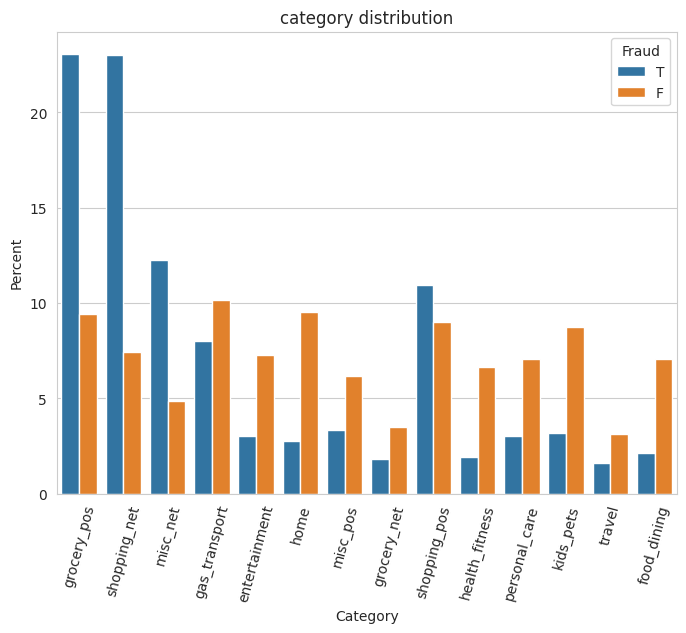

In [ ]:
cate_visual_per(totalcat,'category',75)

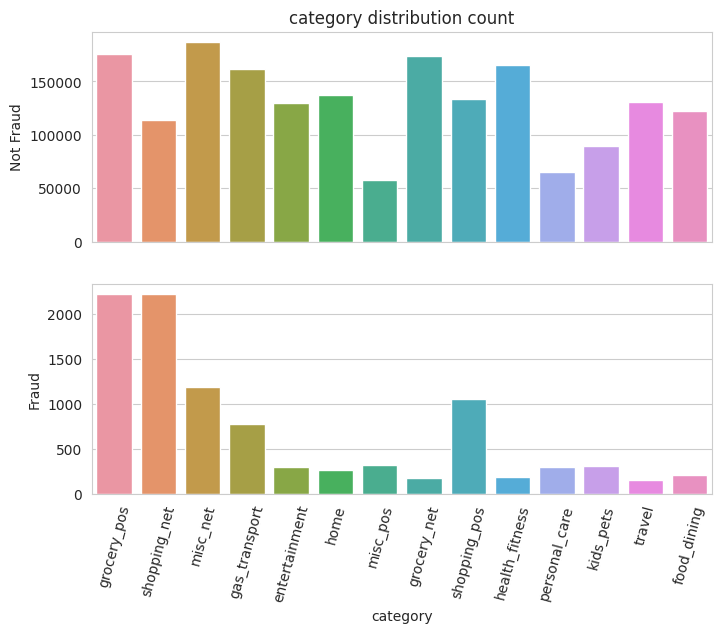

In [ ]:
cate_visual(totalcat,'category',75)

In [ ]:
n = (totalcat[totalcat['is_fraud_cat']=='F']['category'].value_counts(normalize = True)*100).round(2).rename('Non-Fraud')
f = (totalcat[totalcat['is_fraud_cat']=='T']['category'].value_counts(normalize = True)*100).round(2).rename('Fraud')
pd.concat([n,f], axis = 1).sort_values(by='Fraud',ascending=False)

,Non-Fraud,Fraud
grocery_pos,9.44,23.09
shopping_net,7.44,22.99
misc_net,4.86,12.25
shopping_pos,8.98,10.94
gas_transport,10.16,8.00
misc_pos,6.18,3.34
kids_pets,8.76,3.15
entertainment,7.26,3.03
personal_care,7.04,3.00
home,9.51,2.75


Most fraud trancactions happened at shopping net and grocery pos. While for none fraud transctions, the distribution is more equal among all categories.

### 3.1.2 Demographic(Gender, Job, Location)

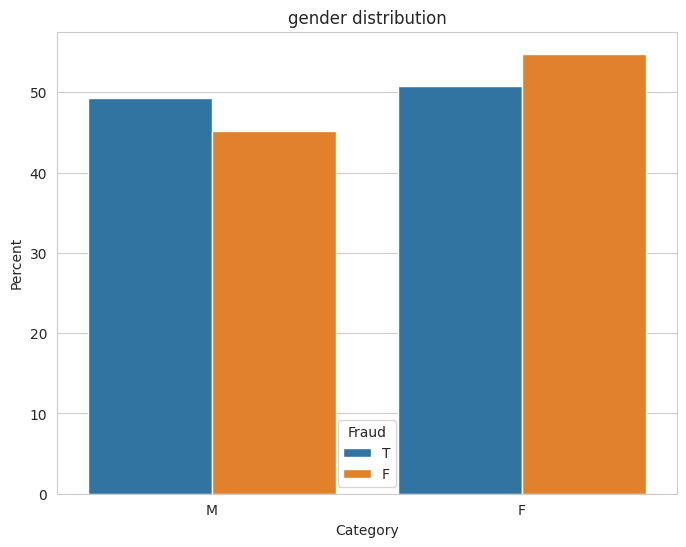

In [ ]:
cate_visual_per(totalcat,'gender',0)

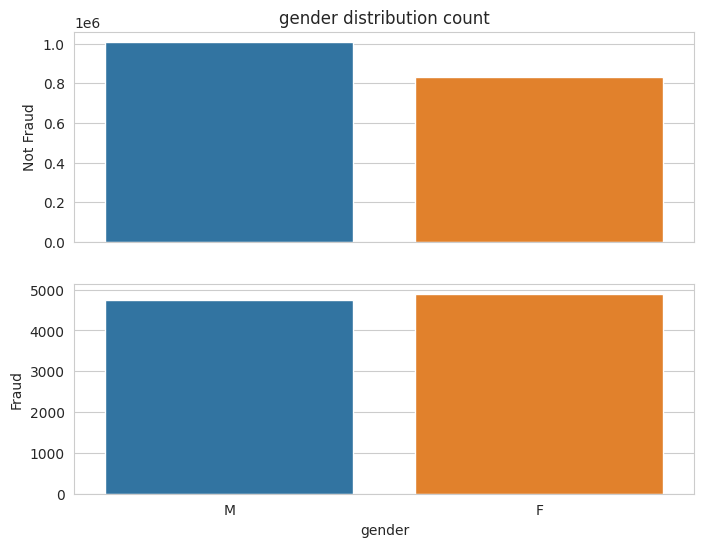

In [ ]:
cate_visual(totalcat,'gender',0)

In [ ]:
n = (totalcat[totalcat['is_fraud_cat']=='F']['gender'].value_counts(normalize = True)*100).round(2).rename('Non-Fraud')
f = (totalcat[totalcat['is_fraud_cat']=='T']['gender'].value_counts(normalize = True)*100).round(2).rename('Fraud')
pd.concat([n,f], axis = 1).sort_values(by='Fraud',ascending=False)

,Non-Fraud,Fraud
F,54.8,50.76
M,45.2,49.24


All together there are more female customers and particularly there is a higher percentage of female customers in fraud transactions.

In [ ]:
!pip install plotly 
import plotly.graph_objects as go 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Fraud_state_num = totalcat[totalcat['is_fraud_cat']=='T'].groupby(by='state').agg({'merchant':'count'}).reset_index()

In [ ]:
fig = go.Figure(data=go.Choropleth( 
    locations=Fraud_state_num['state'], 
    z = Fraud_state_num['merchant'].astype(float),
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "Count",
)) 

fig.update_layout( 
    title_text = 'Fraud Transaction Count',
    geo_scope='usa'
)

In [ ]:
n = (totalcat[totalcat['is_fraud_cat']=='F']['state'].value_counts(normalize = True)*100).round(2).rename('Non-Fraud')
f = (totalcat[totalcat['is_fraud_cat']=='T']['state'].value_counts(normalize = True)*100).round(2).rename('Fraud')
pd.concat([n,f], axis = 1).sort_values(by='Fraud',ascending=False).head()

,Non-Fraud,Fraud
NY,6.44,7.56
TX,7.31,6.13
PA,6.16,5.93
CA,4.35,4.17
OH,3.60,3.73


According to the map, New York, Pennsylvania, Texas and California have the most amount of fruad.

<Axes: >

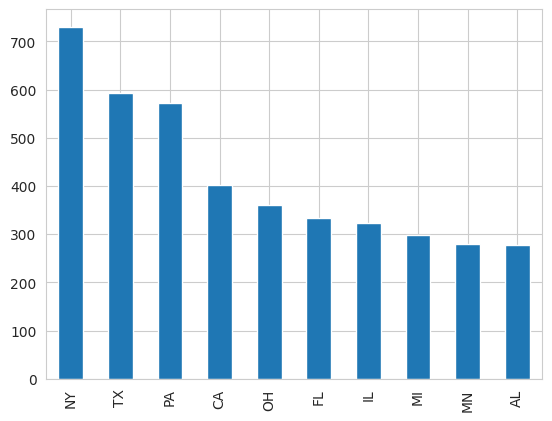

In [ ]:
totalcat[totalcat['is_fraud_cat']=="T"]['state'].value_counts(sort=True,ascending=False).head(10).plot(kind='bar')

<Axes: >

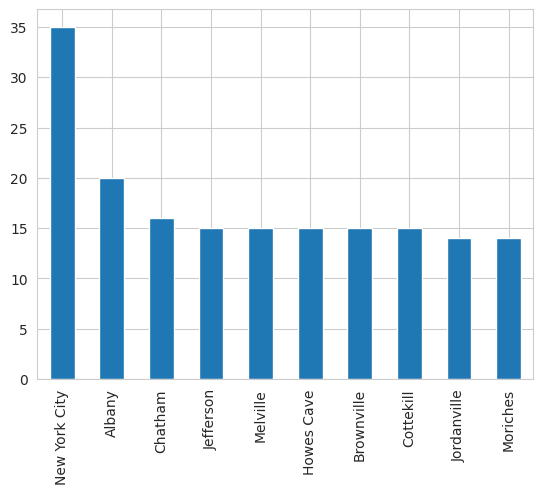

In [ ]:
totalcat[(totalcat['is_fraud_cat']=="T")&(totalcat['state']=="NY")]['city'].value_counts(sort=True,ascending=False).head(10).plot(kind='bar')

For New York state, New York City has the most fraud.

<Axes: >

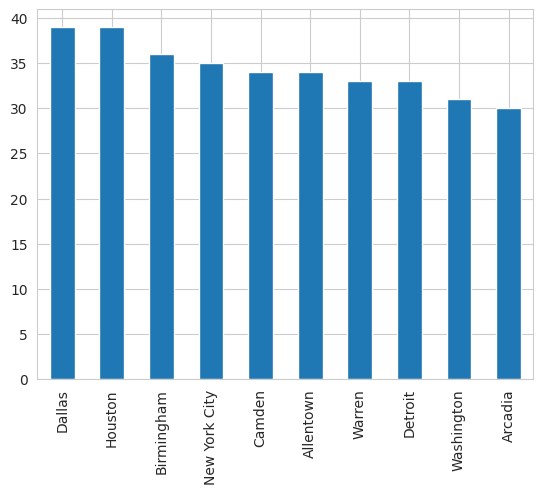

In [ ]:
totalcat[totalcat['is_fraud_cat']=="T"]['city'].value_counts(sort=True,ascending=False).head(10).plot(kind='bar')

<Axes: >

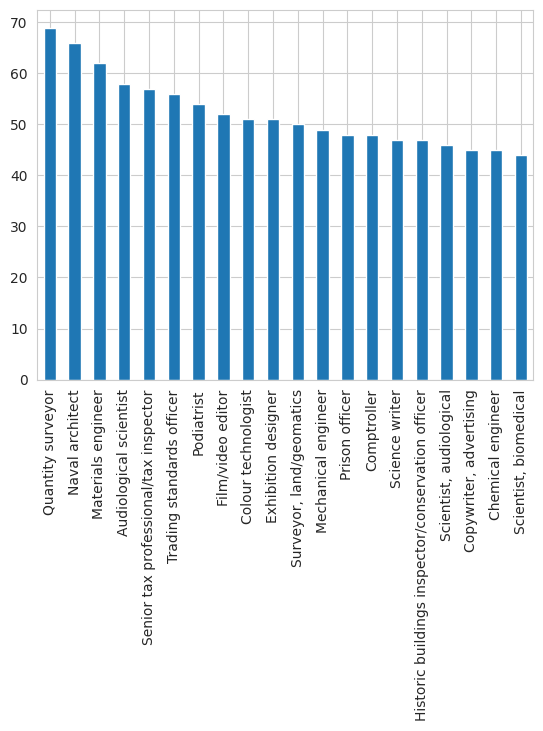

In [ ]:
totalcat[totalcat['is_fraud_cat']=="T"]['job'].value_counts(sort=True,ascending=False).head(20).plot(kind='bar')

### 3.1.3 Time

Time features can be treated as both categorical and numerical data. We can plot them in both ways, and before training, we need to convert them to numerical format.

<Axes: >

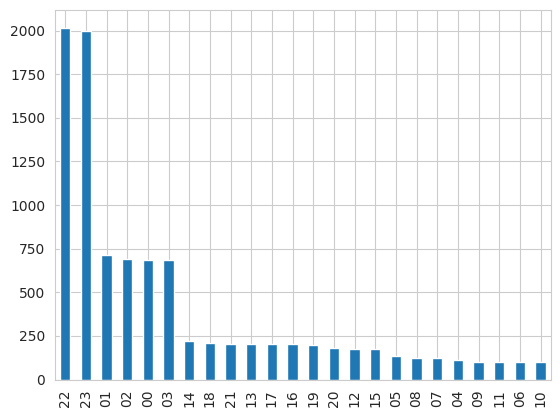

In [ ]:
totalcat[totalcat['is_fraud_cat']=="T"]['trans_hour'].value_counts(sort=True,ascending=False).plot(kind='bar')

<Axes: xlabel='trans_hour', ylabel='Percent'>

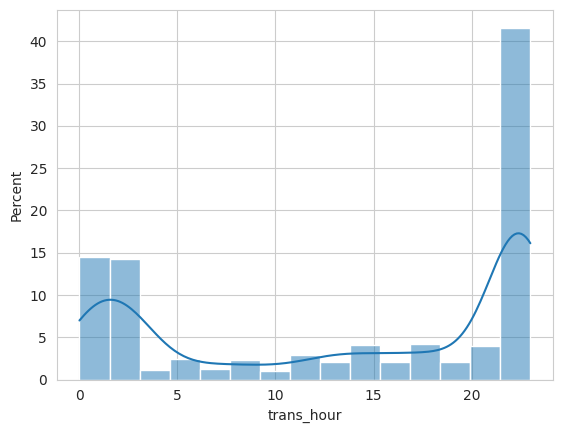

In [ ]:
sns.histplot(totalcat[totalcat['is_fraud_cat']=="T"]['trans_hour'].astype('int64'),kde=True,stat="percent")

In [ ]:
n = (totalcat[totalcat['is_fraud_cat']=='F']['trans_hour'].value_counts(normalize = True)*100).round(2).rename('Non-Fraud')
f = (totalcat[totalcat['is_fraud_cat']=='T']['trans_hour'].value_counts(normalize = True)*100).round(2).rename('Fraud')
pd.concat([n,f], axis = 1).sort_values(by='Fraud',ascending=False).head()

,Non-Fraud,Fraud
22,5.07,20.91
23,5.08,20.72
01,3.29,7.41
02,3.27,7.18
00,3.26,7.11


It appears that there is a significant trend indicating that a higher proportion of fraud incidents occur during the night between 10:00 PM and 3:00 AM.

In [ ]:
def cate_visual1(df,label,rotation,order):
  fig, ax = plt.subplots(2,1,figsize=(8,6))
  sns.countplot(x=label,data=df[df['is_fraud_cat']=='F'],ax=ax[0],order=order)
  ax[0].axes.xaxis.set_visible(False)
  ax[0].set_ylabel('Not Fraud')
  title1 = "{} distribution count"
  ax[0].set_title(title1.format(label))
  sns.countplot(x=label,data=df[df['is_fraud_cat']=='T'],ax=ax[1],order=order)
  ax[1].set_ylabel('Fraud')
  plt.xticks(rotation=rotation)
  plt.show()

In [ ]:
def cate_visual_per1(df,label,rotation,order):
  fig, ax = plt.subplots(1,1,figsize=(8,6))
  a = df[df['is_fraud_cat']=='T'][label].value_counts(normalize=True, sort=False).mul(100).reset_index()
  a.insert(a.shape[1], 'Fraud', 'T')
  b = df[df['is_fraud_cat']=='F'][label].value_counts(normalize=True, sort=False).mul(100).reset_index()
  b.insert(b.shape[1], 'Fraud', 'F')
  c = pd.concat([a,b])
  sns.barplot(x=c['index'], y=c[label], hue=c.Fraud,order=order)
  ax.set_ylabel('Percent')
  ax.set_xlabel('Category')
  title1 = "{} distribution"
  ax.set_title(title1.format(label))
  plt.xticks(rotation=rotation)
  plt.show()

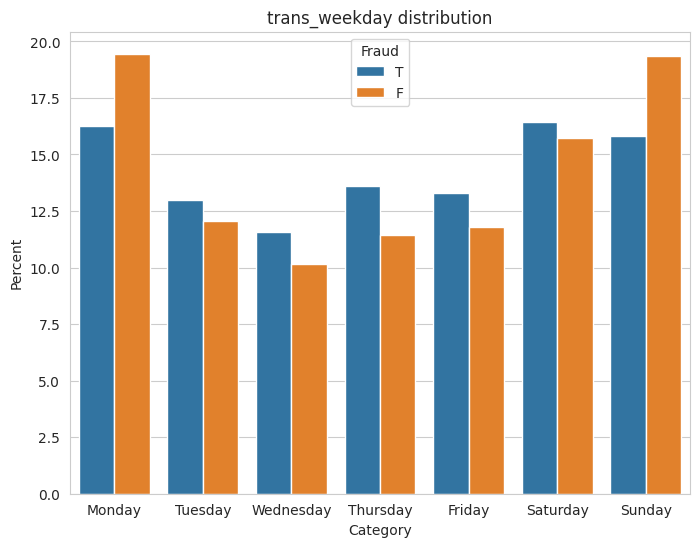

In [ ]:
cate_visual_per1(totalcat,'trans_weekday',0,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

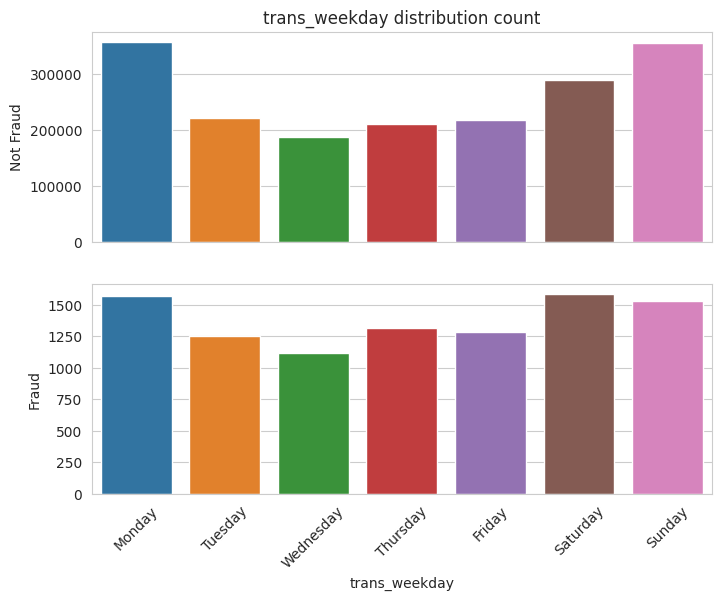

In [ ]:
cate_visual1(totalcat,'trans_weekday',45,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<Axes: >

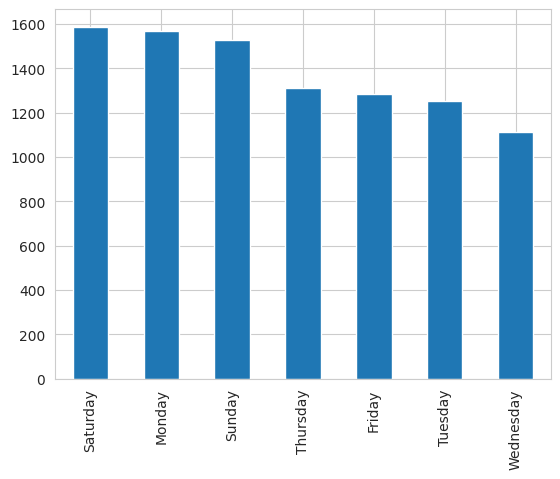

In [ ]:
totalcat[totalcat['is_fraud_cat']=="T"]['trans_weekday'].value_counts(sort=True,ascending=False).plot(kind='bar')

Weekends have a higher percentage of fraud than workdays.

<Axes: xlabel='trans_day', ylabel='Percent'>

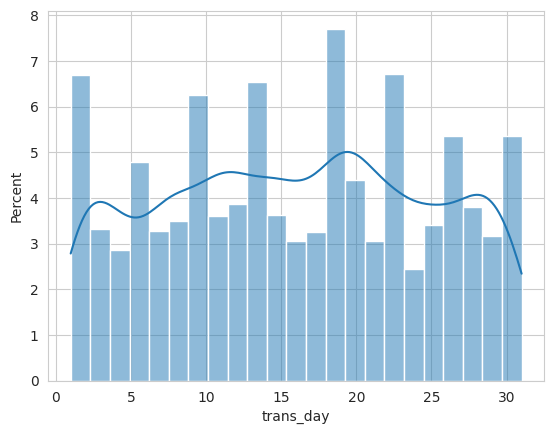

In [ ]:
sns.histplot(totalcat[totalcat['is_fraud_cat']=="T"]['trans_day'].astype('int64'),kde=True,stat="percent")

There is a trend that fraud reaches a climax every a few days.

<Axes: >

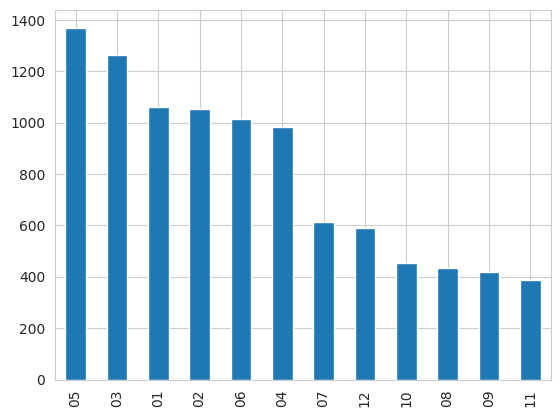

In [ ]:
totalcat[totalcat['is_fraud_cat']=="T"]['trans_month'].value_counts(sort=True,ascending=False).plot(kind='bar')

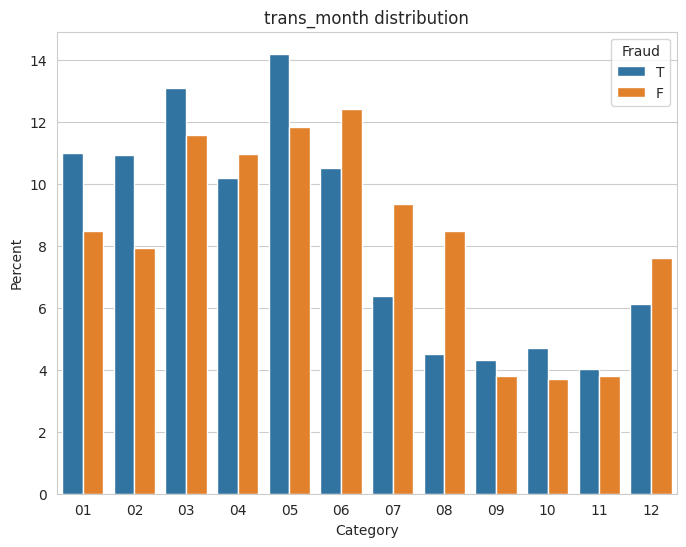

In [ ]:
cate_visual_per1(totalcat, 'trans_month',0,['01','02','03','04','05','06','07','08','09','10','11','12'])

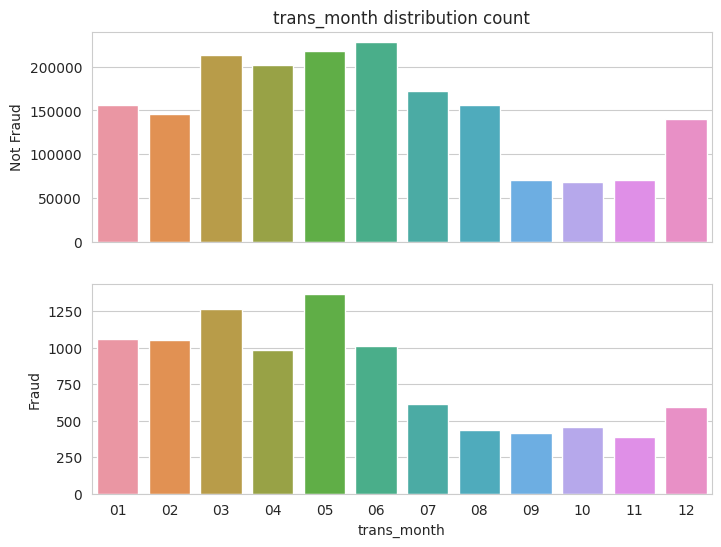

In [ ]:
cate_visual1(totalcat, 'trans_month',0,['01','02','03','04','05','06','07','08','09','10','11','12'])

It seems that during the winter months (September, October, November, January, February, March), there is a higher percentage of fraud incidents compared to the summer months (June, July, August).

## 3.2 Numerical

For numerical data, we usually use a histogram plot (histplot) to visualize the distribution of continuous features. The X-axis represents the values of the feature, and the Y-axis represents either the frequency or density of occurrence of those values.

In [ ]:
totalnum = total[total.select_dtypes(include=np.number).columns]

In [ ]:
totalnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   cc_num                 int64  
 1   amt                    float64
 2   zip                    int64  
 3   lat                    float64
 4   long                   float64
 5   city_pop               int64  
 6   unix_time              int64  
 7   is_fraud               int64  
 8   age                    float64
 9   merch_lat              float64
 10  merch_long             float64
 11  unix_time_prev_trans   float64
 12  timedelta_last_trans   float64
 13  trans_count_mer        int64  
 14  trans_count_cus        float64
 15  trans_mer_cus          float64
 16  fraud_trans_count_mer  float64
 17  fraud_trans_count_cus  float64
 18  fraud_trans_mer_cus    float64
dtypes: float64(13), int64(6)
memory usage: 282.7 MB


In [ ]:
totalnum.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,is_fraud,age,merch_lat,merch_long,unix_time_prev_trans,timedelta_last_trans,trans_count_mer,trans_count_cus,trans_mer_cus,fraud_trans_count_mer,fraud_trans_count_cus,fraud_trans_mer_cus
0,60416207185,124.66,82514,43.0048,-108.8964,1645,1371819942,0,32.0,38.382804,-90.392940,1.371805e+09,251.0,2391,1518.0,2.0,4.0,9.0,0.0
1,60416207185,78.52,82514,43.0048,-108.8964,1645,1371831936,0,32.0,38.541871,-89.637428,1.371820e+09,199.0,1597,1518.0,0.0,6.0,9.0,0.0
2,60416207185,65.25,82514,43.0048,-108.8964,1645,1371887913,0,32.0,38.819811,-90.307449,1.371832e+09,932.0,2603,1518.0,4.0,15.0,9.0,0.0
3,60416207185,87.74,82514,43.0048,-108.8964,1645,1371915151,0,32.0,38.577152,-90.301815,1.371888e+09,453.0,2244,1518.0,1.0,9.0,9.0,0.0
4,60416207185,148.02,82514,43.0048,-108.8964,1645,1371990534,0,32.0,38.690212,-90.133932,1.371915e+09,1256.0,1851,1518.0,0.0,7.0,9.0,0.0


### 3.2.1 Demographic(Age)

<Axes: xlabel='age', ylabel='Percent'>

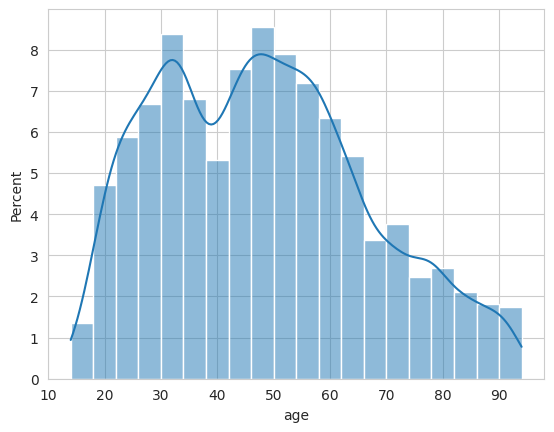

In [ ]:
sns.histplot(totalnum[totalnum['is_fraud']==1]['age'], bins=20,kde=True, stat="percent")

In [ ]:
stat_grid = totalnum.groupby('is_fraud')['age'].agg([np.min,np.max,np.mean,np.median])
stat_grid = stat_grid.transpose().round(2)
stat_grid = stat_grid.rename(columns={0:'Non-Fraud',1:'Fraud'})
stat_grid

is_fraud,Non-Fraud,Fraud
amin,13.00,14.00
amax,95.00,94.00
mean,45.33,48.02
median,43.00,47.00


### 3.2.2 Population

In [ ]:
from scipy.stats import norm, skew

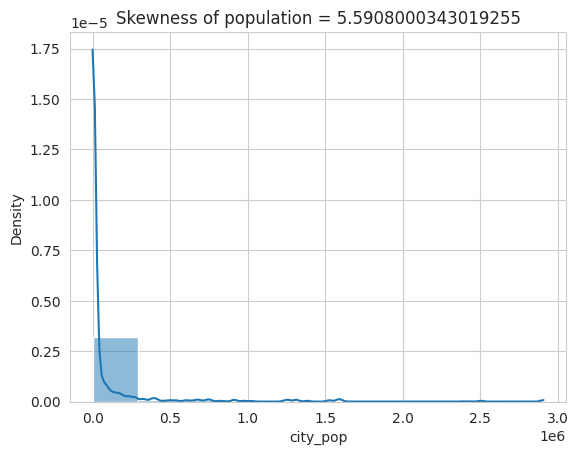

In [ ]:
skewness = str(skew(totalnum['city_pop']))
sns.histplot(totalnum['city_pop'],kde=True, stat="density",bins=10)
plt.title("Skewness of population"+" = "+skewness)
plt.show()

In [ ]:
stat_grid = totalnum.groupby('is_fraud')['city_pop'].agg([np.min,np.max,np.mean,np.median])
stat_grid = stat_grid.transpose().round(2)
stat_grid = stat_grid.rename(columns={0:'Non-Fraud',1:'Fraud'})
stat_grid

is_fraud,Non-Fraud,Fraud
amin,23.00,23.00
amax,2906700.00,2906700.00
mean,88636.58,89998.42
median,2443.00,2693.00


### 3.2.3 Long/Lat

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

In [ ]:
count_transaction = totalnum.groupby(['lat', 'long']).size().reset_index(name='counts')
count_transaction.head()

,lat,long,counts
0,20.0271,-155.3697,2186
1,20.0827,-155.4880,1463
2,24.6557,-81.3824,3655
3,26.1184,-81.7361,5108
4,26.3304,-81.5871,741


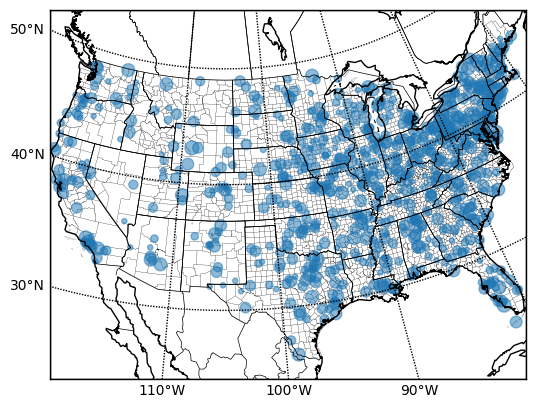

In [ ]:
map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23.41 ,urcrnrlat=45.44,\
            llcrnrlon=-118.67,urcrnrlon=-64.52,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
map.drawmapboundary()
map.drawstates()  
map.drawcoastlines()  
map.drawcountries()     
map.drawcounties()      
parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

lat = np.array(count_transaction["lat"])
lon = np.array(count_transaction["long"]) 
pop = np.array(count_transaction["counts"],dtype=float)

size=(pop/np.max(pop))*100 
x,y = map(lon,lat)

map.scatter(x,y,s=size, alpha=0.5)

A map drawn using longitude and latitude is usually more precise and detailed than a map using states. By visualizing the fraud incidents on a map using longitude and latitude, we can see that a significant number of fraud incidents are concentrated along the East Coast of the United States.

### 3.2.4 Amount

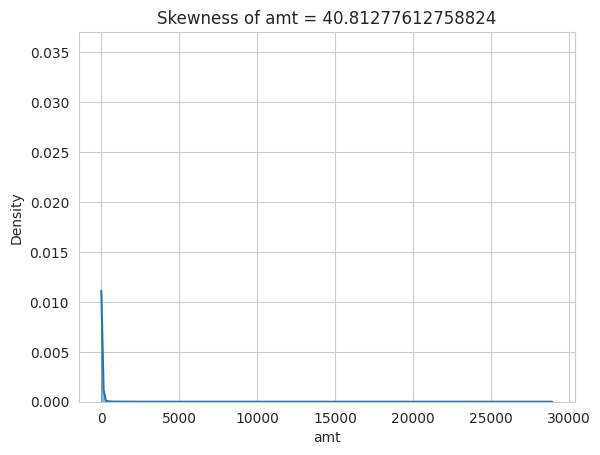

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(totalnum['amt']))
sns.histplot(totalnum['amt'],kde=True, stat="density")
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

<Axes: xlabel='amt', ylabel='Percent'>

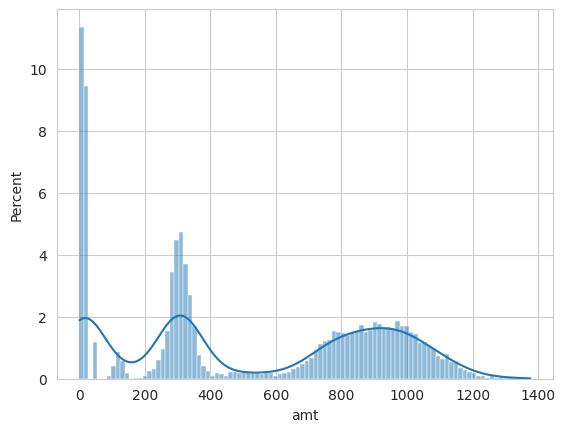

In [ ]:
sns.histplot(totalnum[totalnum['is_fraud']==1]['amt'], bins=100,kde=True, stat="percent")

The distribution plot of fraud transactions shows that there are three peaks or modes. One peak is for small transactions of less than \$50, another peak is around \$300, and the third peak is around \$1000. In contrast, the distribution plot for non-fraudulent transactions shows a more normal or bell-shaped distribution.

<Axes: xlabel='amt', ylabel='Percent'>

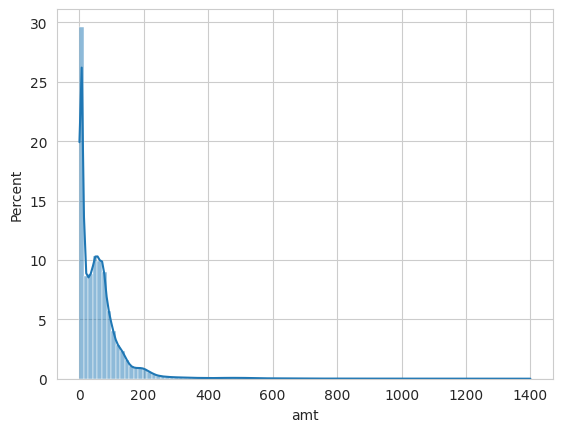

In [ ]:
sns.histplot(totalnum[(totalnum['is_fraud']==0)&(totalnum['amt']<1400)]['amt'], bins=100,kde=True, stat="percent")

And to make sure the gathering of data around 0 for fraud transaction is accurate, not zero for every transcation, we show that there is no transactions with amount lower than \$1 and there are 30 transactions with amount lower than \$5 in the following code.

In [ ]:
len(totalnum[(totalnum['is_fraud']==1)&(totalnum['amt']<5)]['amt']),len(totalnum[(totalnum['is_fraud']==1)&(totalnum['amt']<1)]['amt'])

(30, 0)

In [ ]:
stat_grid = totalnum.groupby('is_fraud')['amt'].agg([np.min,np.max,np.mean,np.median])
stat_grid = stat_grid.transpose().round(2)
stat_grid = stat_grid.rename(columns={0:'Non-Fraud',1:'Fraud'})
stat_grid

is_fraud,Non-Fraud,Fraud
amin,1.00,1.06
amax,28948.90,1376.04
mean,67.65,530.66
median,47.24,390.00


### 3.2.5 Sales&Fraud Transaction Frequency

In [ ]:
freq = train[['cc_num','merchant','trans_count_mer','trans_count_cus','fraud_trans_mer_cus','fraud_trans_count_mer','fraud_trans_count_cus','trans_mer_cus','is_fraud']]

In [ ]:
len(freq[freq['is_fraud']==1]['cc_num'].unique())/len(freq['cc_num'].unique())

0.775178026449644

In [ ]:
len(freq[freq['is_fraud']==1]['merchant'].unique())/len(freq['merchant'].unique())

0.9797979797979798

It appears that 77% of the credit cards in the dataset have had at least one fraudulent transaction, and 98% of the merchants have had at least one fraudulent transaction before.

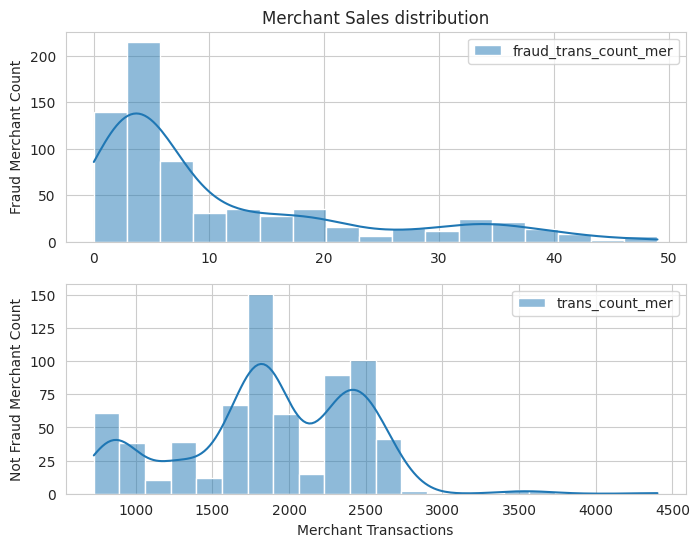

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
sns.histplot(freq.groupby(by='merchant').agg({'fraud_trans_count_mer':'mean'}),kde=True,ax=ax[0])
ax[0].set_ylabel('Fraud Merchant Count')
label='Merchant Sales'
title1 = "{} distribution"
ax[0].set_title(title1.format(label))
sns.histplot(freq.groupby(by='merchant').agg({'trans_count_mer':'mean'}),kde=True,ax=ax[1])
ax[1].set_ylabel('Not Fraud Merchant Count')
plt.xlabel('Merchant Transactions')
plt.xticks(rotation=0)
plt.show()

It seems that most merchants either have no fraudulent transactions or have fewer than 5 fraud incidents. However, there is still a significant number of merchants with fraud incidents ranging from 10 to 50. In contrast, for non-fraudulent transactions, the merchants typically have very high sales volumes, around 2000.

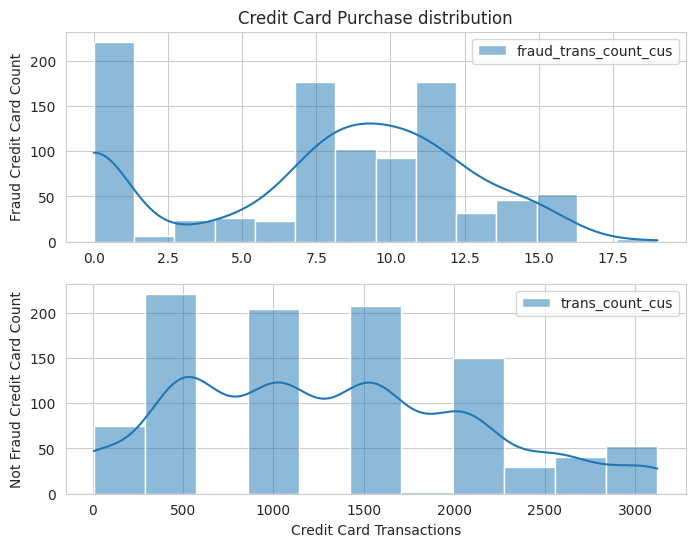

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
sns.histplot(freq.groupby(by='cc_num').agg({'fraud_trans_count_cus':'mean'}),kde=True,ax=ax[0])
ax[0].set_ylabel('Fraud Credit Card Count')
label='Credit Card Purchase'
title1 = "{} distribution"
ax[0].set_title(title1.format(label))
sns.histplot(freq.groupby(by='cc_num').agg({'trans_count_cus':'mean'}),kde=True,ax=ax[1])
ax[1].set_ylabel('Not Fraud Credit Card Count')
plt.xlabel('Credit Card Transactions')
plt.xticks(rotation=0)
plt.show()

In [ ]:
b[(b['trans_count_cus']<=800)&(b['trans_count_cus']>600)]

,cc_num,trans_count_cus


From the Credit Card perspective, we can see that a part of the credit card don't have any fraud transactions, while most credit cards have around 10 fraud transactions for the past 1.5 years. We notice that there are some gaps between 600 to 800, 1200 to 1400 and 1700 to 2000.

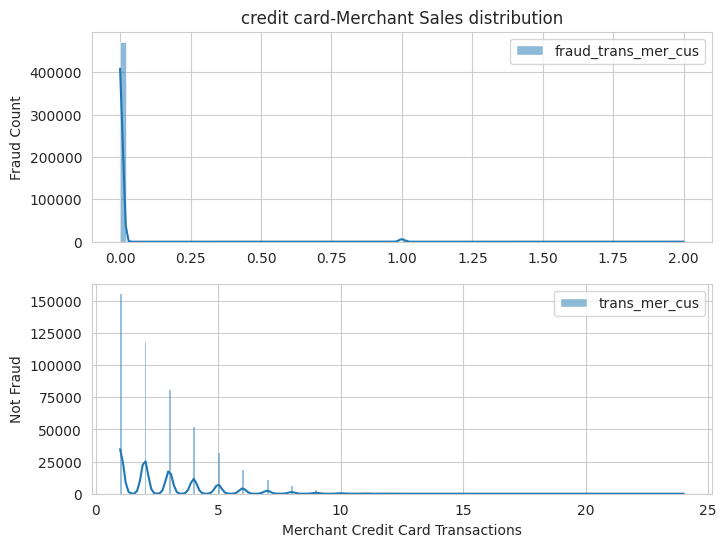

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
sns.histplot(freq.groupby(by=['merchant','cc_num']).agg({'fraud_trans_mer_cus':'mean'}),kde=True,ax=ax[0],bins=100)
ax[0].set_ylabel('Fraud Count')
label='credit card-Merchant Sales'
title1 = "{} distribution"
ax[0].set_title(title1.format(label))
sns.histplot(freq.groupby(by=['merchant','cc_num']).agg({'trans_mer_cus':'mean'}),kde=True,ax=ax[1])
ax[1].set_ylabel('Not Fraud')
plt.xlabel('Merchant Credit Card Transactions')
plt.xticks(rotation=0)
plt.show()

The upper plot shows the fraud and non-fraud count in every distinct merchant-credit card transactions. It shows that there are barely fraud transactions happened more than once for a specific credit card in one merchant. Therefore we cannot use this feature since it is highly correlated to the target and may cause overfitting.

### 3.2.6 Correlation Map

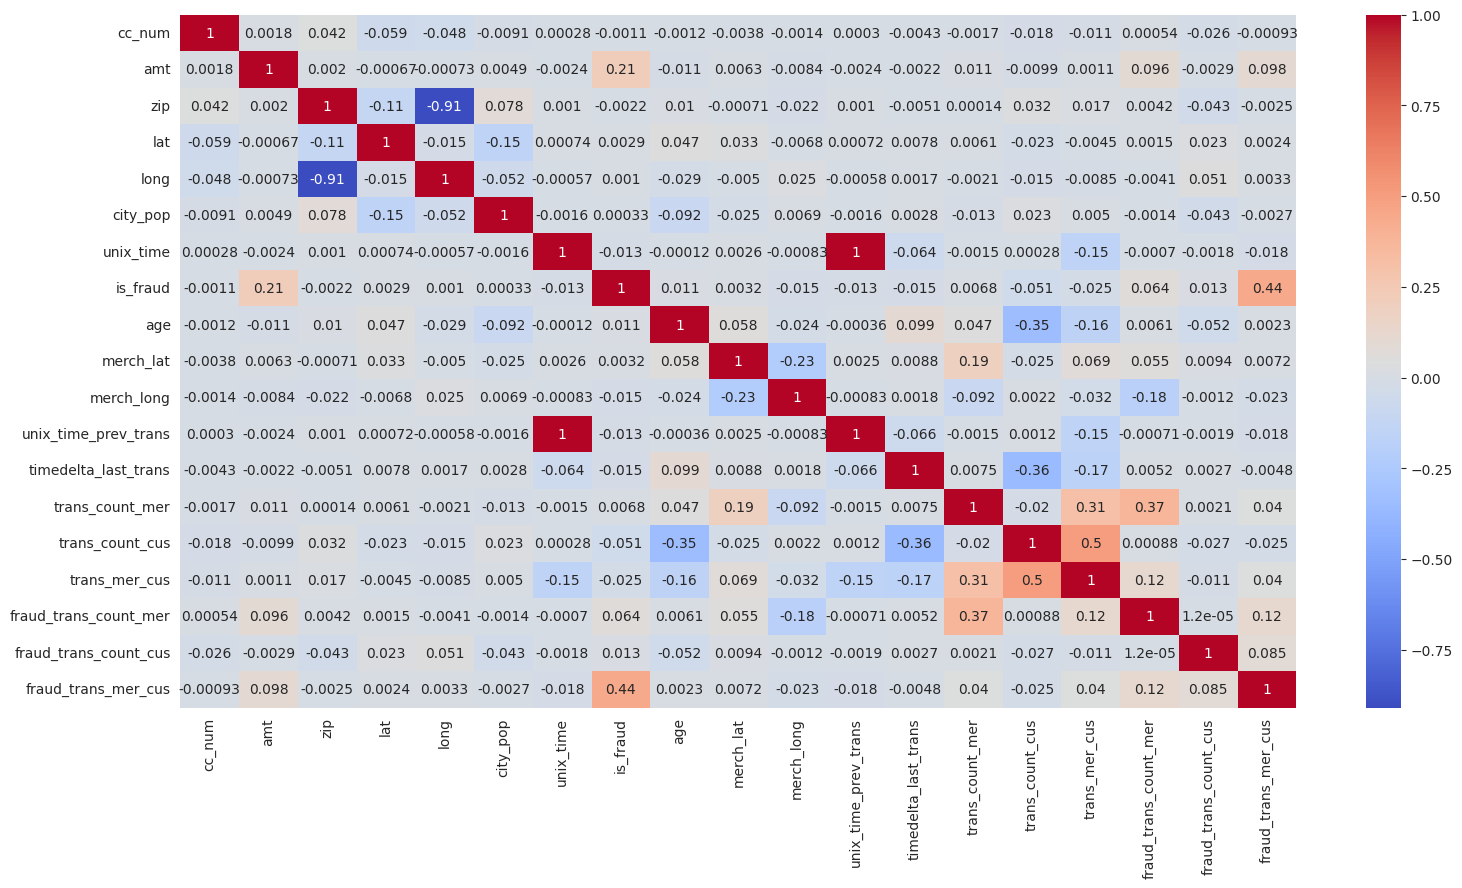

In [ ]:
fig = plt.figure(figsize=(18,9))
sns.heatmap(totalnum.corr(),cmap='coolwarm', annot=True)
plt.show()

**Before carrying out further feature engineering, we will drop unwanted columns based on our data cleaning and EDA process. Also we will convert some object data into numerical data.**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [ ]:
col = ['first','last','merch_lat','merch_long','cc_num','merchant',
       'unix_time','trans_num','trans_date_trans_time','city','job',
       'street','zip','dob','trans_date','trans_year','trans_count_mer',
       'trans_count_cus','trans_mer_cus','fraud_trans_count_mer',
       'fraud_trans_count_cus','fraud_trans_mer_cus','unix_time_prev_trans']
train.drop(col,axis=1,inplace=True)
test.drop(col,axis=1,inplace=True)

In [ ]:
train[['trans_hour','trans_day','trans_month']] = train[['trans_hour','trans_day','trans_month']].apply(pd.to_numeric)
test[['trans_hour','trans_day','trans_month']] = test[['trans_hour','trans_day','trans_month']].apply(pd.to_numeric)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   category              1296675 non-null  object 
 1   amt                   1296675 non-null  float64
 2   gender                1296675 non-null  object 
 3   state                 1296675 non-null  object 
 4   lat                   1296675 non-null  float64
 5   long                  1296675 non-null  float64
 6   city_pop              1296675 non-null  int64  
 7   is_fraud              1296675 non-null  int64  
 8   trans_hour            1296675 non-null  int64  
 9   trans_day             1296675 non-null  int64  
 10  trans_month           1296675 non-null  int64  
 11  trans_weekday         1296675 non-null  object 
 12  age                   1296675 non-null  float64
 13  timedelta_last_trans  1296675 non-null  float64
dtypes: float64(5), int64(5), object(4)

<ipython-input-80-8f856ce2c7b4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



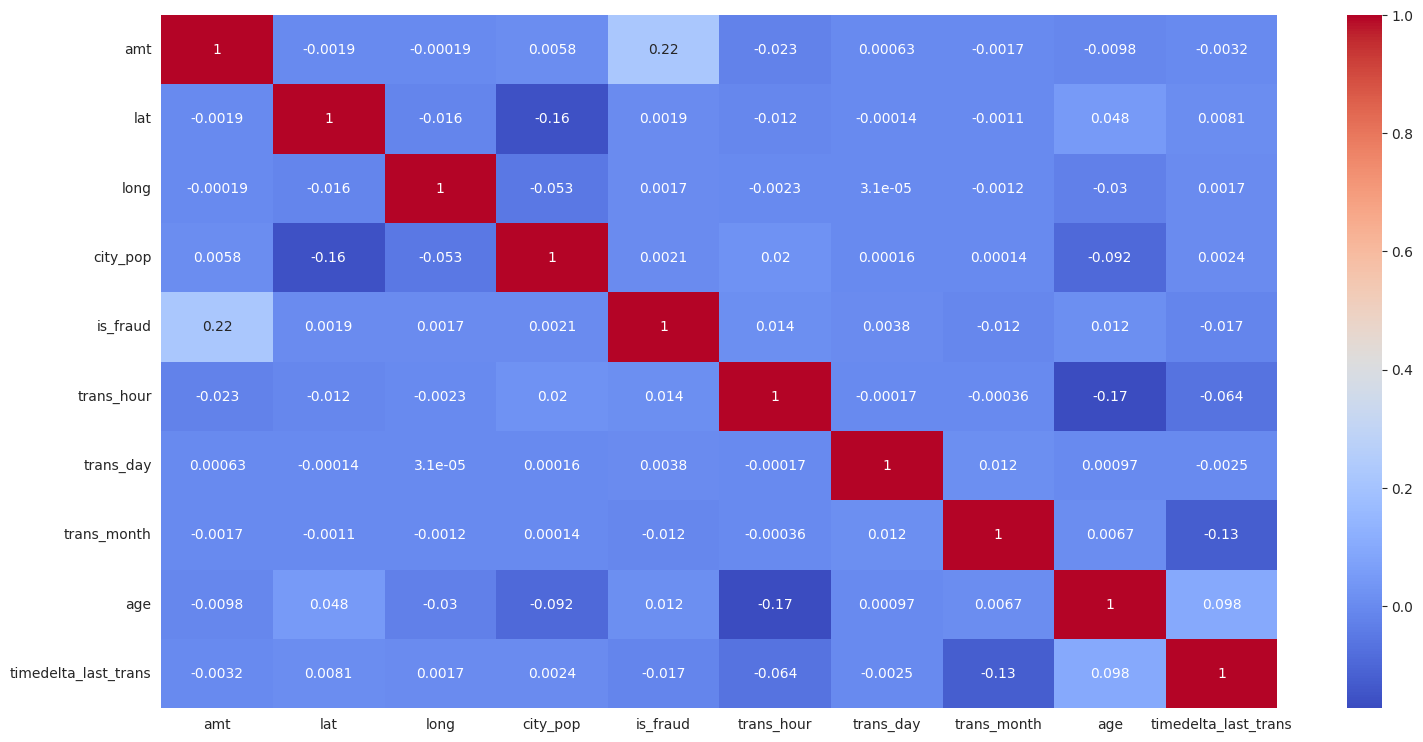

In [ ]:
fig = plt.figure(figsize=(18,9))
sns.heatmap(train.corr(),cmap='coolwarm', annot=True)
plt.show()

We've created some columns but also dropped them as well so we sorted the code and cleaned the dataset again based on the previous analysis on the original dataset to prevent any problem.

In [ ]:
import os
root = '/content/drive/Shareddrives/CIS545-Project/data/'
train = pd.read_csv(os.path.join(root,'fraudTrain.csv'))
test = pd.read_csv(os.path.join(root,'fraudTest.csv'))


train['split_label'] = 'train' 
test['split_label'] = 'test'

data = pd.concat([train,test], axis = 0)

def data_clean(df):
  df.drop(['Unnamed: 0'],axis=1,inplace=True)
  # Timestamps
  df['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
  df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
  df['trans_date']=pd.to_datetime(df['trans_date'])
  df['trans_hour']=df['trans_date_trans_time'].dt.strftime('%H')
  df['trans_month']=df['trans_date_trans_time'].dt.strftime('%m')
  df['trans_weekday']=df['trans_date_trans_time'].dt.strftime('%A')
  df[['trans_hour','trans_month']] = df[['trans_hour','trans_month']].apply(pd.to_numeric)
  # Age
  df['dob']=pd.to_datetime(df['dob'])
  df["age"] = df["trans_date_trans_time"]-df["dob"]
  df["age"]=df["age"].astype('timedelta64[Y]')
  # Previous Trans
  df.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)
  df['unix_time_prev_trans'] = df.groupby(by = ['cc_num'])['unix_time'].shift(1)
  df['unix_time_prev_trans'].fillna(df['unix_time'] - 86400, inplace = True)
  df['timedelta_last_trans'] = (df['unix_time'] - df['unix_time_prev_trans'])//60

  return df

data = data_clean(data)

train = data[data['split_label'] == 'train'] # train in split label
test = data[data['split_label'] == 'test'] # test in split label

train.drop('split_label', axis =1, inplace = True) # dropping the split label column
test.drop('split_label', axis =1, inplace = True) # dropping the split label column

col = ['first','last','merch_lat','merch_long','cc_num','merchant',
       'unix_time','trans_num','trans_date_trans_time','city','job',
       'street','zip','dob','trans_date','unix_time_prev_trans']

train.drop(col,axis=1,inplace=True)
test.drop(col,axis=1,inplace=True)

<ipython-input-43-247bdbf93cdd>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('split_label', axis =1, inplace = True) # dropping the split label column
<ipython-input-43-247bdbf93cdd>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('split_label', axis =1, inplace = True) # dropping the split label column
<ipython-input-43-247bdbf93cdd>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(col,axis=1,in

In [ ]:
train.reset_index().drop('index',axis=1)

,category,amt,gender,state,lat,long,city_pop,is_fraud,trans_hour,trans_month,trans_weekday,age,timedelta_last_trans
0,misc_net,7.27,F,WY,43.0048,-108.8964,1645,0,12,1,Tuesday,32.0,1440.0
1,gas_transport,52.94,F,WY,43.0048,-108.8964,1645,0,8,1,Wednesday,32.0,1197.0
2,gas_transport,82.08,F,WY,43.0048,-108.8964,1645,0,8,1,Wednesday,32.0,2.0
3,kids_pets,34.79,F,WY,43.0048,-108.8964,1645,0,12,1,Wednesday,32.0,230.0
4,home,27.18,F,WY,43.0048,-108.8964,1645,0,13,1,Wednesday,32.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,personal_care,60.47,M,IL,41.1730,-89.2187,532,0,21,6,Saturday,64.0,512.0
1296671,gas_transport,74.29,M,IL,41.1730,-89.2187,532,0,0,6,Sunday,64.0,216.0
1296672,shopping_net,246.56,M,IL,41.1730,-89.2187,532,0,2,6,Sunday,64.0,126.0
1296673,shopping_pos,2.62,M,IL,41.1730,-89.2187,532,0,8,6,Sunday,64.0,316.0


In [ ]:
train = train.reset_index().drop('index',axis=1)
test = test.reset_index().drop('index',axis=1)
train.to_csv("/content/drive/Shareddrives/CIS545-Project/data/train_cleaned.csv")
test.to_csv("/content/drive/Shareddrives/CIS545-Project/data/test_cleaned.csv")

# 4 Data Preprocessing

In [ ]:
train = pd.read_csv("/content/drive/Shareddrives/CIS545-Project/data/train_cleaned.csv",index_col='Unnamed: 0')
test = pd.read_csv("/content/drive/Shareddrives/CIS545-Project/data/test_cleaned.csv",index_col='Unnamed: 0')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   category              1296675 non-null  object 
 1   amt                   1296675 non-null  float64
 2   gender                1296675 non-null  object 
 3   state                 1296675 non-null  object 
 4   lat                   1296675 non-null  float64
 5   long                  1296675 non-null  float64
 6   city_pop              1296675 non-null  int64  
 7   is_fraud              1296675 non-null  int64  
 8   trans_hour            1296675 non-null  int64  
 9   trans_month           1296675 non-null  int64  
 10  trans_weekday         1296675 non-null  object 
 11  age                   1296675 non-null  float64
 12  timedelta_last_trans  1296675 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 138.5+ MB


In [ ]:
X_train = train.drop('is_fraud',axis=1)
X_test = test.drop('is_fraud',axis=1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [ ]:
X_train.head()

,category,amt,gender,state,lat,long,city_pop,trans_hour,trans_month,trans_weekday,age,timedelta_last_trans
0,misc_net,7.27,F,WY,43.0048,-108.8964,1645,12,1,Tuesday,32.0,1440.0
1,gas_transport,52.94,F,WY,43.0048,-108.8964,1645,8,1,Wednesday,32.0,1197.0
2,gas_transport,82.08,F,WY,43.0048,-108.8964,1645,8,1,Wednesday,32.0,2.0
3,kids_pets,34.79,F,WY,43.0048,-108.8964,1645,12,1,Wednesday,32.0,230.0
4,home,27.18,F,WY,43.0048,-108.8964,1645,13,1,Wednesday,32.0,32.0


## 4.1 Outliers

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 8.2 MB/s eta 0:00:00


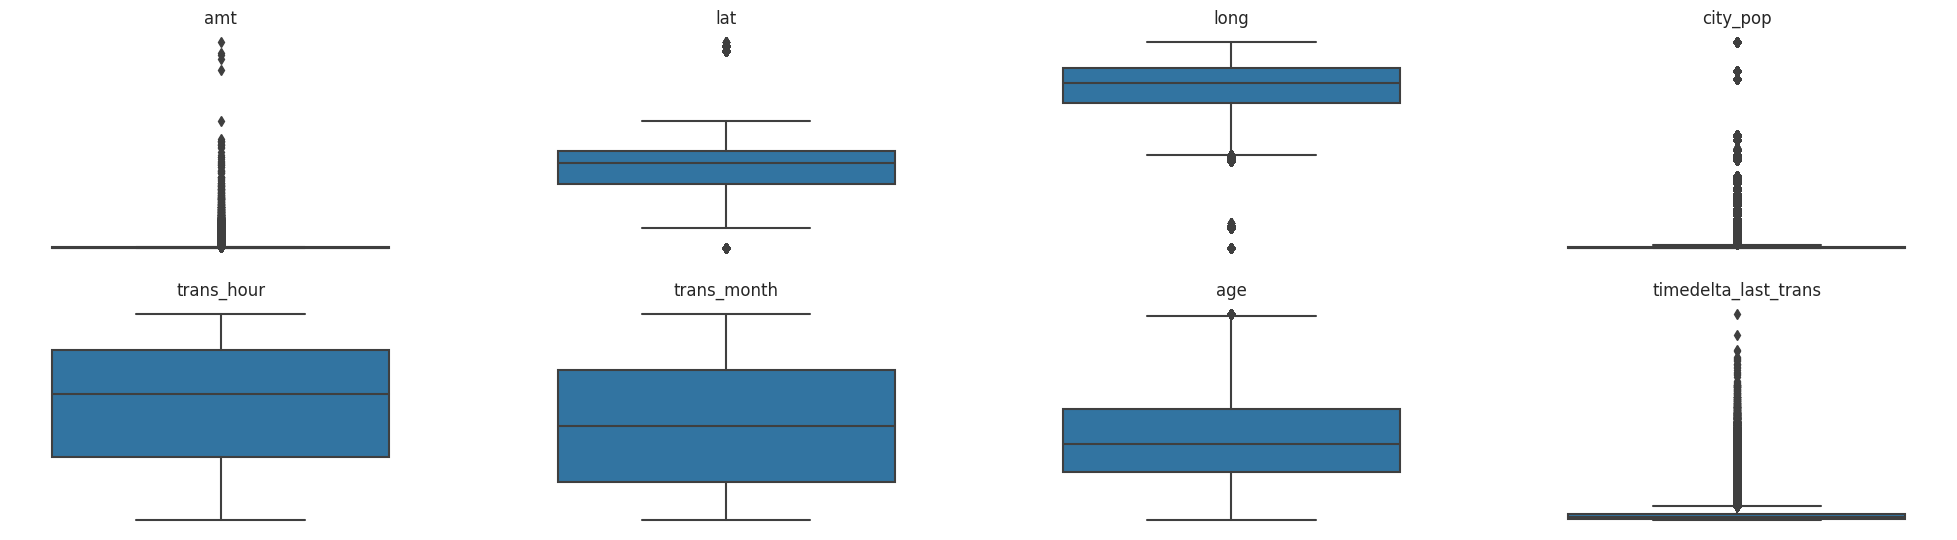

In [ ]:
num_cols = X_train.select_dtypes(include = np.number).columns

plt.figure(figsize = [25,10])

i=1
for col_name in num_cols:
  if col_name != 'is_fraud':
    plot_var = X_train[col_name]
    plt.subplot(3,4,i)
    sns.boxplot(plot_var)
    plt.title(col_name)
    plt.axis(False)
    i+=1

In [ ]:
from feature_engine.outliers import Winsorizer

According to the boxplot, amount, city population and timedelta last trans have extreme outliers.

In [ ]:
variables = ['amt', 'city_pop', 'timedelta_last_trans']


capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables)

In [ ]:
capper_iqr.fit(X_train)

X_train = capper_iqr.transform(X_train)
X_test = capper_iqr.transform(X_test)

In [ ]:
print('upper capping value : ',capper_iqr.right_tail_caps_)
print('lower capping value : ',capper_iqr.left_tail_caps_)

upper capping value :  {'amt': 193.375, 'city_pop': 49705.5, 'timedelta_last_trans': 1530.0}
lower capping value :  {'amt': -100.58499999999998, 'city_pop': -28634.5, 'timedelta_last_trans': -758.0}


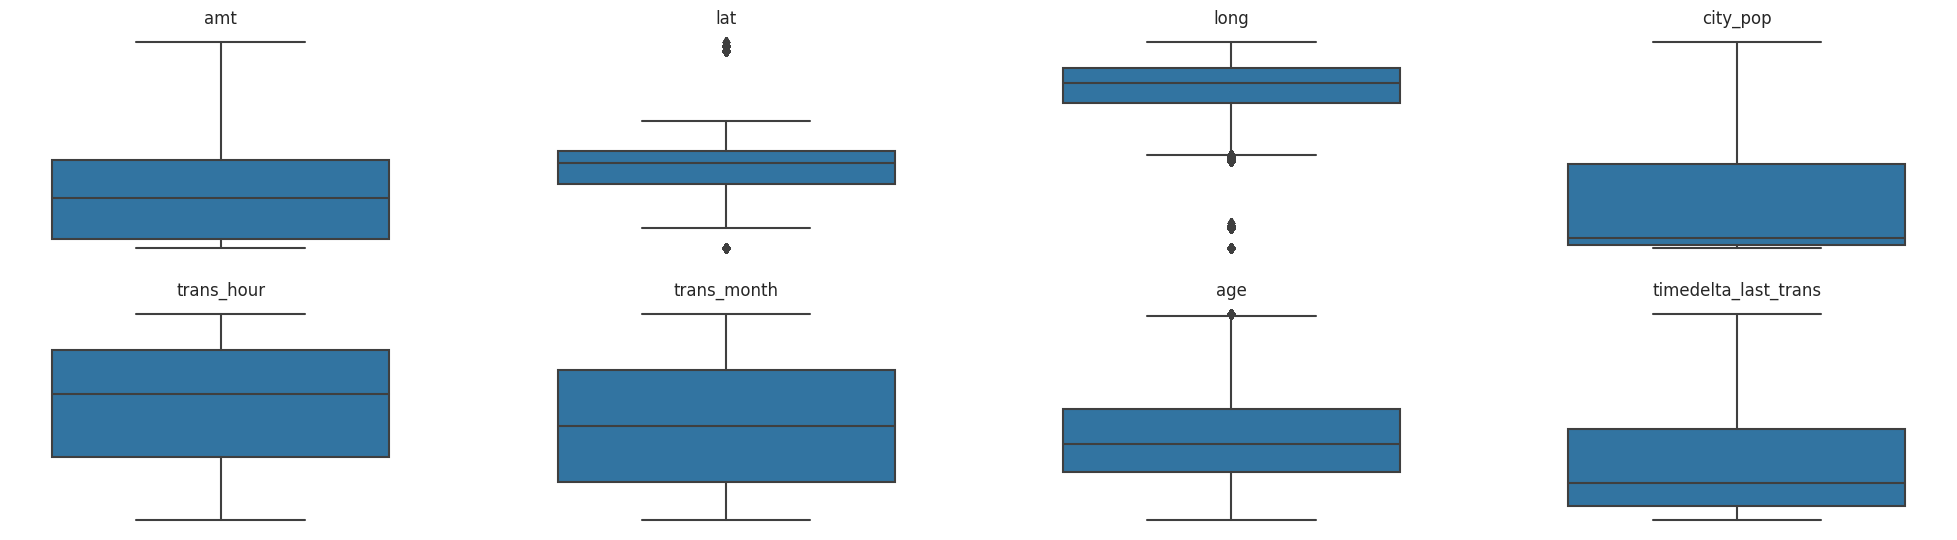

In [ ]:
plt.figure(figsize = [25,10])

i=1
for col_name in num_cols:
  if col_name != 'is_fraud':
    plot_var = X_train[col_name]
    plt.subplot(3,4,i)
    sns.boxplot(plot_var)
    plt.title(col_name)
    plt.axis(False)
    i+=1

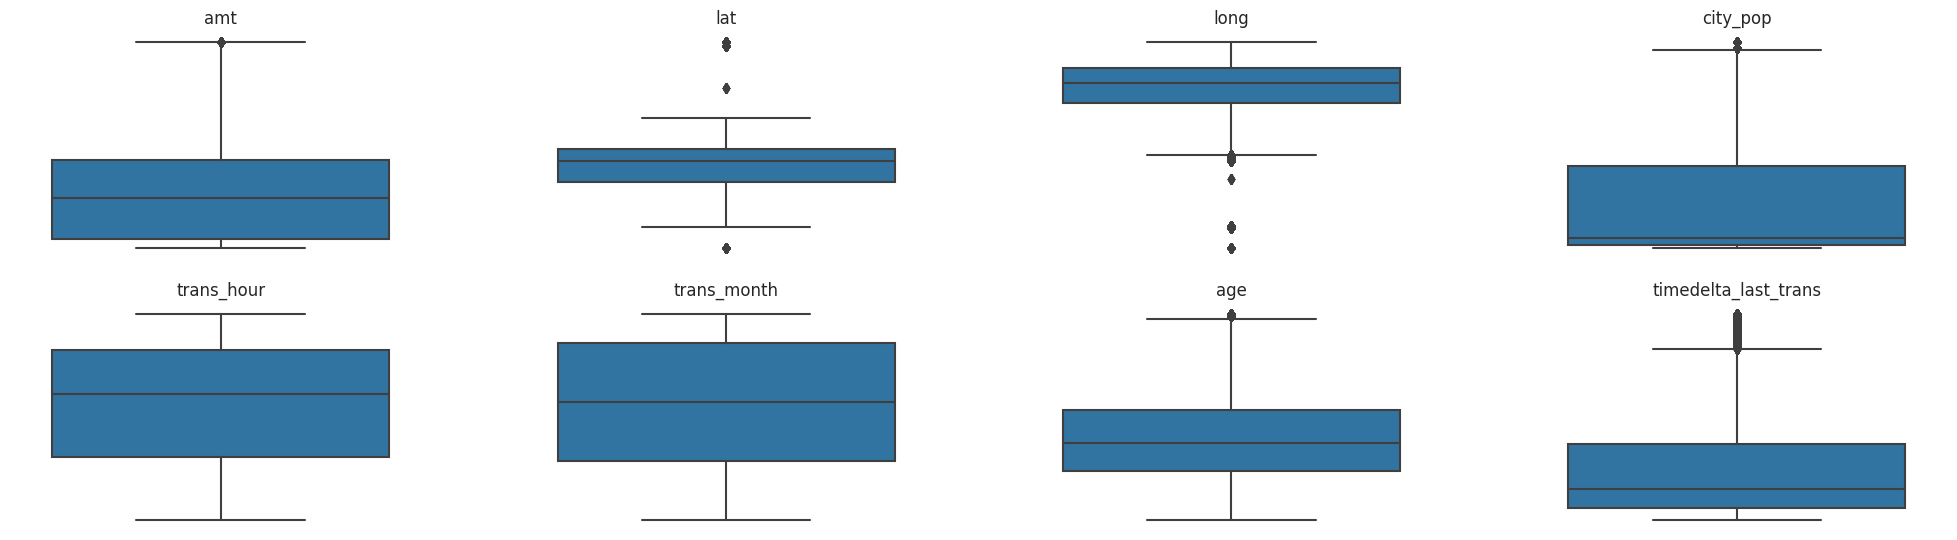

In [ ]:
plt.figure(figsize = [25,10])

i=1
for col_name in num_cols:
  if col_name != 'is_fraud':
    plot_var = X_test[col_name]
    plt.subplot(3,4,i)
    sns.boxplot(plot_var)
    plt.title(col_name)
    plt.axis(False)
    i+=1

## 4.2 Encoding


We are using label encoding for weekday and one hot encoding for the other categorical features such as category and gender here. 

In [ ]:
weekday_dict = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
X_train['trans_weekday'] = X_train['trans_weekday'].map(weekday_dict)
X_test['trans_weekday'] = X_test['trans_weekday'].map(weekday_dict)

In [ ]:
cat_cols = X_train.select_dtypes(exclude=np.number).columns
X_train[cat_cols].nunique().sort_values(ascending = False)

state       51
category    14
gender       2
dtype: int64

In [ ]:
X_train.drop(['state'],axis=1,inplace=True)
X_test.drop(['state'],axis=1,inplace=True)

In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
variables = ['category','gender']
onehot_encoder = OneHotEncoder(variables = variables, drop_last = True)
onehot_encoder.fit(X_train)

X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

In [ ]:
X_train.head()

,amt,lat,long,city_pop,trans_hour,trans_month,trans_weekday,age,timedelta_last_trans,category_misc_net,...,category_shopping_net,category_food_dining,category_personal_care,category_grocery_pos,category_entertainment,category_shopping_pos,category_misc_pos,category_travel,category_health_fitness,gender_F
0,7.27,43.0048,-108.8964,1645.0,12,1,2,32.0,1440.0,1,...,0,0,0,0,0,0,0,0,0,1
1,52.94,43.0048,-108.8964,1645.0,8,1,3,32.0,1197.0,0,...,0,0,0,0,0,0,0,0,0,1
2,82.08,43.0048,-108.8964,1645.0,8,1,3,32.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,34.79,43.0048,-108.8964,1645.0,12,1,3,32.0,230.0,0,...,0,0,0,0,0,0,0,0,0,1
4,27.18,43.0048,-108.8964,1645.0,13,1,3,32.0,32.0,0,...,0,0,0,0,0,0,0,0,0,1


## 4.3 Scaling

### 4.3.1 Non-linear

Non-linear scaling changes the distribution of features. If certain features are skewed to one side, non-linear scaling should be considered. In the case that certain features are clustered in small values, it is recommended to increase the interval between small values of specific features and decrease the interval between large values through scaling such as log scaling. Through this process, if we make a distribution that is as similar to the normal distribution as possible, you will be able to learn the features evenly while the model trains.

The Yeo-Johnson transform is useful for normalizing skewed data or data that has unequal variances across different groups. It can be applied to a wide range of data types, including continuous, discrete, and even count data. 

In [ ]:
skew = X_train[X_train.select_dtypes(include=np.number).columns].skew()
feature_high_skew = list(skew[(skew > 1) | (skew < -1)].index)
feature_high_skew

['amt',
 'long',
 'city_pop',
 'timedelta_last_trans',
 'category_misc_net',
 'category_gas_transport',
 'category_kids_pets',
 'category_home',
 'category_shopping_net',
 'category_food_dining',
 'category_personal_care',
 'category_grocery_pos',
 'category_entertainment',
 'category_shopping_pos',
 'category_misc_pos',
 'category_travel',
 'category_health_fitness']

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

In [ ]:
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)
yeojohnson_transformer.fit(X_train)

X_train = yeojohnson_transformer.transform(X_train)
X_test = yeojohnson_transformer.transform(X_test)

### 4.3.2 Linear

We will use standard scaler to place the mean to 0 and standard deviation to 1. We can see that although there are no outlier in train dataset there are still some in test dataset, so we cannot use min max scaling.

In [ ]:
X_train.describe()

,amt,lat,long,city_pop,trans_hour,trans_month,trans_weekday,age,timedelta_last_trans,category_misc_net,...,category_shopping_net,category_food_dining,category_personal_care,category_grocery_pos,category_entertainment,category_shopping_pos,category_misc_pos,category_travel,category_health_fitness,gender_F
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.163054e+00,3.853762e+01,-4.999952e-01,8.154745e+00,1.280486e+01,6.142150e+00,4.070604e+00,4.549741e+01,1.170491e+01,1.651172e-03,...,3.922513e-03,3.448570e-03,3.395757e-03,6.303508e-03,3.643795e-03,5.612574e-03,2.615712e-03,6.764307e-04,3.040457e-03,5.474487e-01
std,2.923661e+00,5.075808e+00,1.668858e-05,1.981386e+00,6.817824e+00,3.417703e+00,2.198153e+00,1.739731e+01,4.657743e+00,7.289286e-03,...,1.375308e-02,1.251853e-02,1.237807e-02,1.941612e-02,1.303255e-02,1.784927e-02,1.022427e-02,3.766885e-03,1.141645e-02,4.977437e-01
min,7.590155e-01,2.002710e+01,-5.000410e-01,3.191482e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01,0.000000e+00,-0.000000e+00,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
25%,3.260106e+00,3.462050e+01,-5.000067e-01,6.670345e+00,7.000000e+00,3.000000e+00,2.000000e+00,3.200000e+01,8.287376e+00,-0.000000e+00,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
50%,6.677687e+00,3.935430e+01,-4.999951e-01,7.888059e+00,1.400000e+01,6.000000e+00,4.000000e+00,4.300000e+01,1.162092e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,8.288691e+00,4.194040e+01,-4.999830e-01,1.005142e+01,1.900000e+01,9.000000e+00,6.000000e+00,5.700000e+01,1.527751e+01,-0.000000e+00,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,1.000000e+00
max,1.122280e+01,6.669330e+01,-4.999537e-01,1.097043e+01,2.300000e+01,1.200000e+01,7.000000e+00,9.500000e+01,1.940821e+01,3.383053e-02,...,5.214341e-02,4.889160e-02,4.851576e-02,6.610914e-02,5.025653e-02,6.237730e-02,4.258022e-02,2.165332e-02,4.590743e-02,1.000000e+00


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

Let's take a look at the final columns and some statistics.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   lat                      1296675 non-null  float64
 2   long                     1296675 non-null  float64
 3   city_pop                 1296675 non-null  float64
 4   trans_hour               1296675 non-null  float64
 5   trans_month              1296675 non-null  float64
 6   trans_weekday            1296675 non-null  float64
 7   age                      1296675 non-null  float64
 8   timedelta_last_trans     1296675 non-null  float64
 9   category_misc_net        1296675 non-null  float64
 10  category_gas_transport   1296675 non-null  float64
 11  category_kids_pets       1296675 non-null  float64
 12  category_home            1296675 non-null  float64
 13  category_shopping_net    1296675 non-null 

In [ ]:
print('Final columns : ', len(X_train.columns))

X_train.agg(func =[np.min,np.max,np.mean, np.std], axis = 0).transpose().round(2)

Final columns :  23


,amin,amax,mean,std
amt,-1.85,1.73,0.0,1.0
lat,-3.65,5.55,0.0,1.0
long,-2.74,2.49,0.0,1.0
city_pop,-2.50,1.42,-0.0,1.0
trans_hour,-1.88,1.50,0.0,1.0
trans_month,-1.50,1.71,0.0,1.0
trans_weekday,-1.40,1.33,-0.0,1.0
age,-1.87,2.85,0.0,1.0
timedelta_last_trans,-2.51,1.65,0.0,1.0
category_misc_net,-0.23,4.41,-0.0,1.0


## 4.4 PCA

PCA is trained on dataset that doesn't do scaling on one hot features. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)

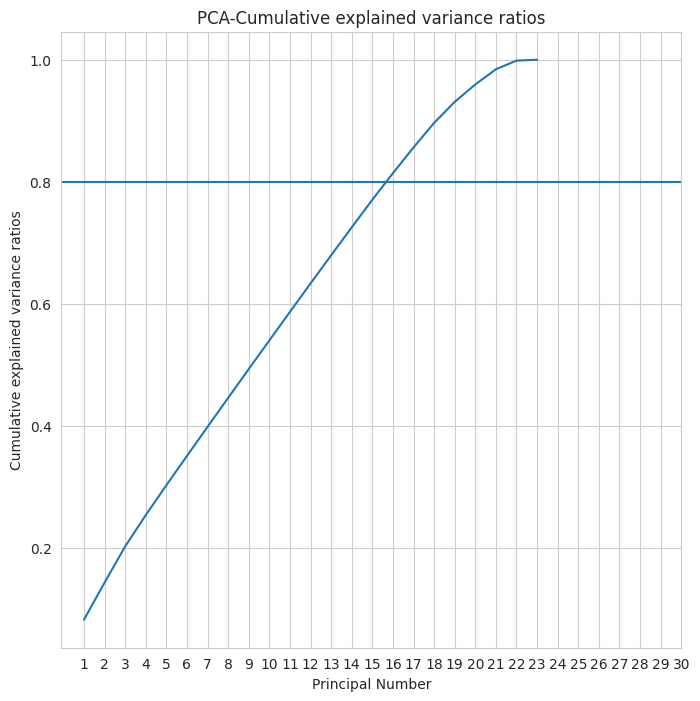

In [ ]:
flg, ax = plt.subplots(figsize=(8,8))
plot = sns.lineplot(data=cum_evr, ax=ax)
ax.set_xticks(ticks=range(0,30), labels=range(1,31))
plt.axhline(0.8)
ax.set_title('PCA-Cumulative explained variance ratios')
ax.set_xlabel('Principal Number')
ax.set_ylabel('Cumulative explained variance ratios')
plt.show()

The plot shows that we need to keep 16 features to maintain 80\% of variance. So we do not use PCA here.

In [ ]:
if cum_evr[9]>0.8:
  pca = PCA(n_components=10)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  col_name = ['var1','var2','var3','var4','var5','var6','var7','var8','var9','var10']
  X_train_pca = pd.DataFrame(X_train_pca)
  X_train_pca.columns = col_name
  X_test_pca = pd.DataFrame(X_test_pca)
  X_test_pca.columns = col_name

We deployed three methods to produce clean data: one using the StandardScaler on variables after one-hot encoding, one without the StandardScaler, and one without the StandardScaler but with PCA applied. Ultimately, we used the scaled one-hot features in the final dataset.

In [ ]:
file_list = ["X_train_imbalanced.csv","X_test_imbalanced.csv","y_train_imbalanced.csv","y_test_imbalanced.csv"]

fold = 'imbalanced/onehot_scaled/'

X_train.to_csv(os.path.join(root,fold,file_list[0]))
X_test.to_csv(os.path.join(root,fold,file_list[1]))
y_train.to_csv(os.path.join(root,fold,file_list[2]))
y_test.to_csv(os.path.join(root,fold,file_list[3]))

## 4.5 Imbalance

In [ ]:
fold = 'imbalanced/onehot_scaled/'

X_train = pd.read_csv(os.path.join(root,fold,file_list[0]),index_col='Unnamed: 0')
X_test = pd.read_csv(os.path.join(root,fold,file_list[1]),index_col='Unnamed: 0')
y_train = pd.read_csv(os.path.join(root,fold,file_list[2]),index_col='Unnamed: 0')
y_test = pd.read_csv(os.path.join(root,fold,file_list[3]),index_col='Unnamed: 0')

In [ ]:
X_train.shape, X_test.shape

((1296675, 21), (555719, 21))

In [ ]:
X_train.head()

,amt,city_pop,trans_hour,trans_month,trans_weekday,timedelta_last_trans,age,category_misc_net,category_gas_transport,category_kids_pets,...,category_shopping_net,category_food_dining,category_personal_care,category_grocery_pos,category_entertainment,category_shopping_pos,category_misc_pos,category_travel,category_health_fitness,gender_F
0,-1.147127,-0.340894,-0.118052,-1.504564,-0.941975,1.582548,-0.775833,4.414613,-0.336170,-0.309027,...,-0.28521,-0.275477,-0.274337,-0.324654,-0.279592,-0.314443,-0.255834,-0.179573,-0.266323,0.909206
1,0.276028,-0.340894,-0.704750,-1.504564,-0.487047,1.371236,-0.775833,-0.226520,2.974683,-0.309027,...,-0.28521,-0.275477,-0.274337,-0.324654,-0.279592,-0.314443,-0.255834,-0.179573,-0.266323,0.909206
2,0.713456,-0.340894,-0.704750,-1.504564,-0.487047,-2.244194,-0.775833,-0.226520,2.974683,-0.309027,...,-0.28521,-0.275477,-0.274337,-0.324654,-0.279592,-0.314443,-0.255834,-0.179573,-0.266323,0.909206
3,-0.096598,-0.340894,-0.118052,-1.504564,-0.487047,-0.159574,-0.775833,-0.226520,-0.336170,3.235962,...,-0.28521,-0.275477,-0.274337,-0.324654,-0.279592,-0.314443,-0.255834,-0.179573,-0.266323,0.909206
4,-0.296240,-0.340894,0.028622,-1.504564,-0.487047,-1.353386,-0.775833,-0.226520,-0.336170,-0.309027,...,-0.28521,-0.275477,-0.274337,-0.324654,-0.279592,-0.314443,-0.255834,-0.179573,-0.266323,0.909206


In [ ]:
import plotly.graph_objects as go

colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = y_train['is_fraud'].value_counts()/y_train['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()


The pie chart above shows that our dataset is extremely imbalanced.

### 4.5.1 Oversampling

We use two oversampling methods and choose a better way to make train datasets balanced. Since only minority of train data is fraud, oversampling will bring potential risk to cause overfitting. We will use regularization to deal with overfitting in modeling part.

#### a) SMOTE

Synthetic prime sampling technique samples the majority class and interpolates existing prime samples to synthesize new prime instances.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   city_pop                 1296675 non-null  float64
 2   trans_hour               1296675 non-null  float64
 3   trans_month              1296675 non-null  float64
 4   trans_weekday            1296675 non-null  float64
 5   timedelta_last_trans     1296675 non-null  float64
 6   age                      1296675 non-null  float64
 7   category_misc_net        1296675 non-null  float64
 8   category_gas_transport   1296675 non-null  float64
 9   category_kids_pets       1296675 non-null  float64
 10  category_home            1296675 non-null  float64
 11  category_shopping_net    1296675 non-null  float64
 12  category_food_dining     1296675 non-null  float64
 13  category_personal_care   1296675 non-null 

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)

Feature/label dataset for training before applying SMOTE:  (1296675, 21) (1296675, 1)
Feature/label dataset for training after applying SMOTE:  (2578338, 21) (2578338, 1)


In [ ]:
one = y_train_smote[y_train_smote['is_fraud']==1]
zero = y_train_smote[y_train_smote['is_fraud']==0]
len(one),len(zero)

(1289169, 1289169)

In [ ]:
label = 'smote'
file_list = ["X_train_{}.csv".format(label),"X_test_imbalanced.csv","y_train_{}.csv".format(label),"y_test_imbalanced.csv"]

fold = 'balanced/onehot_scaled/' # Standardscaler after one hot encoding and don't use PCA
# fold = 'balanced/onehot_noscaled/' # Standardscaler before one hot encoding and don't use PCA

X_train_smote.to_csv(os.path.join(root,fold,file_list[0]))
X_test.to_csv(os.path.join(root,fold,file_list[1]))
y_train_smote.to_csv(os.path.join(root,fold,file_list[2]))
y_test.to_csv(os.path.join(root,fold,file_list[3]))

#### b) RandomOverSampler

Object to over-sample the minority class by picking samples at random with replacement. 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying RandomOverSampler: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying RandomOverSampler: ', X_train_ros.shape, y_train_ros.shape)

Feature/label dataset for training before applying RandomOverSampler:  (1296675, 21) (1296675, 1)
Feature/label dataset for training after applying RandomOverSampler:  (2578338, 21) (2578338, 1)


In [ ]:
one = y_train_ros[y_train_ros['is_fraud']==1]
zero = y_train_ros[y_train_ros['is_fraud']==0]
len(one),len(zero)

(1289169, 1289169)

In [ ]:
X_train_ros.shape, y_train_ros.shape

((2578338, 21), (2578338, 1))

In [ ]:
label = 'ros'
file_list = ["X_train_{}.csv".format(label),"X_test_imbalanced.csv","y_train_{}.csv".format(label),"y_test_imbalanced.csv"]

fold = 'balanced/onehot_scaled/' # Standardscaler after one hot encoding and don't use PCA

X_train_ros.to_csv(os.path.join(root,fold,file_list[0]))
y_train_ros.to_csv(os.path.join(root,fold,file_list[2]))

### 4.5.2 Undersampling

Fraud sample size is too small to use undersampling. If we use undersampling, it is hard to get accurate models.

# 5 Modeling

In [ ]:
root = '/content/drive/Shareddrives/CIS545-Project/data/'

label = 'ros'
# label = 'smote'

fold = 'balanced/onehot_scaled/' 

file_list = ["X_train_{}.csv".format(label),"X_test_imbalanced.csv","y_train_{}.csv".format(label),"y_test_imbalanced.csv"]

X_train = pd.read_csv(os.path.join(root,fold,file_list[0]),index_col='Unnamed: 0')
X_test = pd.read_csv(os.path.join(root,fold,file_list[1]),index_col='Unnamed: 0')
y_train = pd.read_csv(os.path.join(root,fold,file_list[2]),index_col='Unnamed: 0')
y_test = pd.read_csv(os.path.join(root,fold,file_list[3]),index_col='Unnamed: 0')

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2578338, 21), (555719, 21), (2578338, 1), (555719, 1))

In [ ]:
one = y_train[y_train['is_fraud']==1]
zero = y_train[y_train['is_fraud']==0]
len(one),len(zero)

(1289169, 1289169)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578338 entries, 0 to 2578337
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   city_pop                 float64
 2   trans_hour               float64
 3   trans_month              float64
 4   trans_weekday            float64
 5   timedelta_last_trans     float64
 6   age                      float64
 7   category_misc_net        float64
 8   category_gas_transport   float64
 9   category_kids_pets       float64
 10  category_home            float64
 11  category_shopping_net    float64
 12  category_food_dining     float64
 13  category_personal_care   float64
 14  category_grocery_pos     float64
 15  category_entertainment   float64
 16  category_shopping_pos    float64
 17  category_misc_pos        float64
 18  category_travel          float64
 19  category_health_fitness  float64
 20  gender_F                 float64
dtypes: float

## 5.1 Evaluation Metrics

We have defined two functions to evaluate and visualize the performance of our credit card fraud detection model. As the test dataset is highly imbalanced, we cannot solely rely on accuracy as an evaluation metric. If our model simply predicts all transactions as non-fraudulent, it could still have an accuracy of over 90%. Therefore, we must focus on other metrics such as recall and precision.

Our primary objective is to ensure that our model can identify all fraudulent transactions, while minimizing the number of false positives. This means that we want to detect all fraudulent transactions while disturbing as few non-fraudulent cardholders as possible. By using metrics such as recall and precision, we can assess the model's performance in this regard. Specifically, we want a high recall, indicating that most of the fraudulent transactions are detected, and a high precision, indicating that when the model predicts a transaction as fraudulent, it is likely to be correct.

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred): 
  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  num_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=(4, 4))
  cax = ax.matshow(cm, cmap="GnBu") 
  fig.colorbar(cax)
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Prediction",
         ylabel="Test",
         xticks=np.arange(num_classes), # create enough axis slots for each class
         yticks=np.arange(num_classes))
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if i==0 and j==0:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white",
                 size=8)
    else:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="black",
              size=8)

In [ ]:
from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score, accuracy_score, confusion_matrix
def df_model_evaluation(y_test, y_pred, model_id, method):
  ras = round(100*roc_auc_score(y_test, y_pred), 2)
  acc = round(100*accuracy_score(y_test, y_pred), 2)
  pre = round(100*precision_score(y_test, y_pred), 2)
  rec = round(100*recall_score(y_test, y_pred), 2)
  f1 = round(100*f1_score(y_test, y_pred), 2)
  d={'model_id':[model_id], 'method':[method], 'roc_auc':[ras], 'accuracy':[acc], 'precision':[pre], 'recall':[rec], 'f1_score':[f1]}
  return pd.DataFrame(data=d)

## 5.2 Model Building

### 5.2.1 Logistic Regression

The logistic regression model estimates the probability of a transaction being fraudulent, given the values of the independent variables or features. The model uses a logistic function to transform the linear combination of these features into a probability value between 0 and 1.

Logistic regression is an effective and interpretable algorithm for credit card fraud detection, which can help financial institutions identify fraudulent transactions while minimizing the impact on legitimate transactions.

Try RandomOverSampler dataset, and use l2 penalty to deal with overfitting.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty="l2", random_state=42, solver='lbfgs', max_iter=60).fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

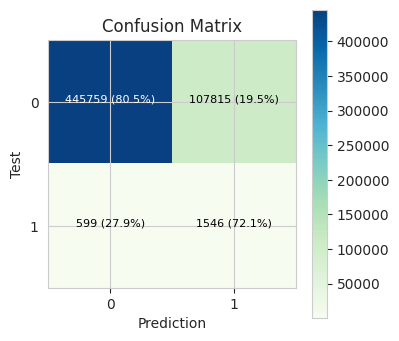

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
df_model1 = df_model_evaluation(y_test, y_pred, "model1", "Logistic Regression")

In [ ]:
df_model1

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model1,Logistic Regression,76.3,80.49,1.41,72.07,2.77


### 5.2.2 SVM

SVM works by finding the optimal hyperplane that separates the fraudulent and non-fraudulent transactions in a high-dimensional feature space. In this case SVM uses the features of the transaction such as transaction amount, merchant location, and cardholder details to classify a transaction as fraudulent or not. The algorithm constructs a hyperplane that maximizes the margin between the two classes, allowing it to separate fraudulent and non-fraudulent transactions effectively.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

dt = SGDClassifier(loss="hinge", penalty="l2", random_state=42, learning_rate="optimal", early_stopping=True, class_weight="balanced")

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

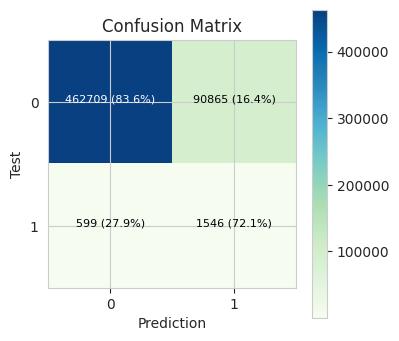

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
df_model2 = df_model_evaluation(y_test, y_pred, "model2", "SVM")

In [ ]:
df_model2

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model2,SVM,77.83,83.54,1.67,72.07,3.27


In [ ]:
frames = [df_model1, df_model2]
models = pd.concat(frames)
models

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model1,Logistic Regression,76.30,80.49,1.41,72.07,2.77
0,model2,SVM,77.83,83.54,1.67,72.07,3.27


### 5.2.3 Decision Tree

The decision tree algorithm constructs a tree-like model where each internal node represents a feature, and each leaf node represents a class label. The algorithm uses the training data to select the best feature to split the data at each node based on the information gain or other criteria.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth = 30, min_samples_split= 30, random_state=42)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

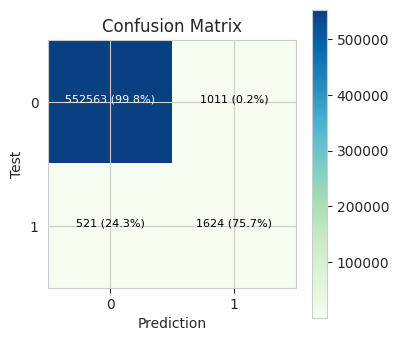

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
df_model3 = df_model_evaluation(y_test, y_pred, "model3", "Desicion Tree")

In [ ]:
df_model3

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model3,Desicion Tree,87.76,99.72,61.63,75.71,67.95


In [ ]:
frames = [models, df_model3]
models = pd.concat(frames)
models

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model1,Logistic Regression,76.30,80.49,1.41,72.07,2.77
0,model2,SVM,77.83,83.54,1.67,72.07,3.27
0,model3,Desicion Tree,87.76,99.72,61.63,75.71,67.95


### 5.2.4 Random Forest

Random Forest is an exsemble learning algorithms by randomly selecting subsets of the data and features to construct decision trees, which reduces the risk of overfitting and increases the model's accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini', max_features='sqrt', min_samples_leaf=1)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)

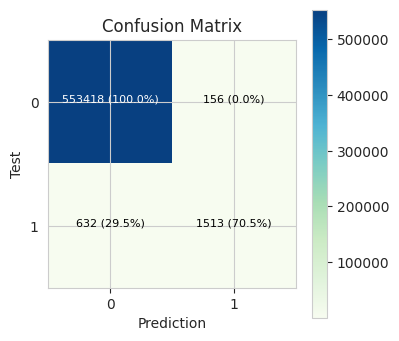

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
df_model4 = df_model_evaluation(y_test, y_pred, "model4", "Random Forest")

In [ ]:
frames = [models, df_model4]
models = pd.concat(frames)
models

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model1,Logistic Regression,76.30,80.49,1.41,72.07,2.77
0,model2,SVM,77.83,83.54,1.67,72.07,3.27
0,model3,Desicion Tree,87.76,99.72,61.63,75.71,67.95
0,model4,Random Forest,85.25,99.86,90.65,70.54,79.34


### 5.2.5 XGBoost

XGBoost is a popular machine learning algorithm that is widely used in credit card fraud detection due to its high accuracy and efficiency. XGBoost is an ensemble learning method that combines multiple weak models to create a strong model.

The algorithm initially constructs a simple decision tree and then iteratively adds more trees, with each tree correcting the errors of the previous trees. During each iteration, the algorithm calculates the gradient and the Hessian of the loss function and uses them to update the model parameters.

In [ ]:
from xgboost import XGBClassifier
model5 = XGBClassifier(random_state=5,  n_estimators=100)
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)

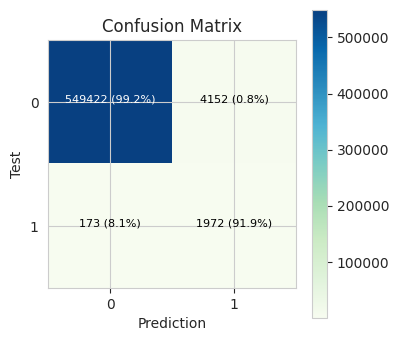

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
df_model5 = df_model_evaluation(y_test, y_pred, "model5", "XGBoost")

In [ ]:
df_model5

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model5,XGBoost,95.59,99.22,32.2,91.93,47.7


In [ ]:
frames = [models, df_model5]
models = pd.concat(frames)
models

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model1,Logistic Regression,76.30,80.49,1.41,72.07,2.77
0,model2,SVM,77.83,83.54,1.67,72.07,3.27
0,model3,Desicion Tree,87.76,99.72,61.63,75.71,67.95
0,model4,Random Forest,85.25,99.86,90.65,70.54,79.34
0,model5,XGBoost,95.59,99.22,32.20,91.93,47.70


### 5.2.6 ANN

ANN is a type of neural network, a subset of machine learning algorithms that are modeled after the structure and function of the human brain. ANNs have several advantages for credit card fraud detection, including their ability to handle both categorical and continuous features, their ability to capture complex relationships between the features and the class label, and their ability to learn from unstructured data such as images and text. However, ANNs can be computationally expensive and require a large amount of training data to avoid overfitting. ANNs can also be less interpretable than some other machine learning algorithms.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import os
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
torch.manual_seed(42) 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.0.0+cu118
cpu


In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split(np.array(X_train), np.array(y_train), test_size=0.2, random_state=42)

In [ ]:
class Mydata(Dataset):
    def __init__(self, X, y):
        self.x = X
        self.y = y

    def __getitem__(self, idx):
        assert idx < len(self.x)
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

train_dataset = Mydata(X_train1, y_train1)
train_loader = DataLoader(train_dataset, batch_size = 1024, shuffle=True)
val_dataset = Mydata(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size = 1024, shuffle=True)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 64)
        self.linear2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(64)
        self.drop = nn.Dropout(0.2)
        self.sig = nn.Sigmoid()


    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.bn1(x)
        x = self.linear2(x)
        x = self.sig(x)

        return x

model = MLP(X_train1.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.1, lr=1e-5)
criterion = nn.CrossEntropyLoss()

In [ ]:
def validate(loader, model):                       
    correct = 0                                               
    total = 0                                                 
    running_loss = 0.0                                        
    model.eval()                                              
    with torch.no_grad():                                     
      for inputs, labels in loader:                     
        labels = labels.type(torch.LongTensor).squeeze()
        inputs = inputs.float()
        inputs, labels = inputs.to(device), labels.to(device)                  
                                                          
        outputs = model(inputs)                           
        loss = criterion(outputs, labels)                 
        _, predicted = torch.max(outputs.data, 1)         
        total += labels.size(0)                           
        correct += (predicted == labels).sum().item()     
        running_loss = running_loss + loss.item()         
    mean_val_accuracy = (100*correct/total)               
    mean_val_loss = (running_loss/len(loader))
    return mean_val_loss, mean_val_accuracy

In [ ]:
epoch = 20

train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
i = 0 # calculate early stopping

for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  model.train()
  for inputs, labels in train_loader:
    labels = labels.type(torch.LongTensor).squeeze()
    inputs = inputs.float()
    inputs, labels = inputs.to(device), labels.to(device)
    
    optimizer.zero_grad()
    output = model(inputs)
    pred = torch.argmax(output, dim=1)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    total += labels.size(0)
    correct += (pred == labels.squeeze()).cpu().detach().sum().item()

  accuracy = 100.0*correct/total
  train_acc_list.append(accuracy)

  train_loss_list.append(running_loss/len(train_loader))

  val_loss, val_acc = validate(val_loader, model)
  val_loss_list.append(val_loss)
  val_acc_list.append(val_acc)

  if epoch>0 and val_loss>val_loss_list[-2]:
    i+=1
  if i>1:
    break

  print("The loss for Epoch {} is: {}, Acc = {}, Val loss = {}, Val Acc = {}".format(epoch+1, running_loss/len(train_loader), accuracy, val_loss, val_acc))

The loss for Epoch 1 is: 0.6690982069034435, Acc = 63.832120504006944, Val loss = 0.6456451945834689, Val Acc = 71.72366716569576
The loss for Epoch 2 is: 0.6253716438638957, Acc = 75.27689838898127, Val loss = 0.6067195367955026, Val Acc = 77.29294817595817
The loss for Epoch 3 is: 0.5921791668269534, Acc = 78.04113115525023, Val loss = 0.5795615644208969, Val Acc = 78.72701040204163
The loss for Epoch 4 is: 0.5693237373905797, Acc = 79.17805562693015, Val loss = 0.560069947370461, Val Acc = 79.61110637076568
The loss for Epoch 5 is: 0.5528089778299071, Acc = 80.0962344921873, Val loss = 0.5459316895594672, Val Acc = 80.32164105587316
The loss for Epoch 6 is: 0.5399148708241749, Acc = 80.81889007936316, Val loss = 0.5338289678569824, Val Acc = 81.24762444053151
The loss for Epoch 7 is: 0.5279784883518077, Acc = 81.5820271783659, Val loss = 0.522169443290858, Val Acc = 82.0522118882692
The loss for Epoch 8 is: 0.5151409617428744, Acc = 82.62208690677618, Val loss = 0.5076822160728394, 

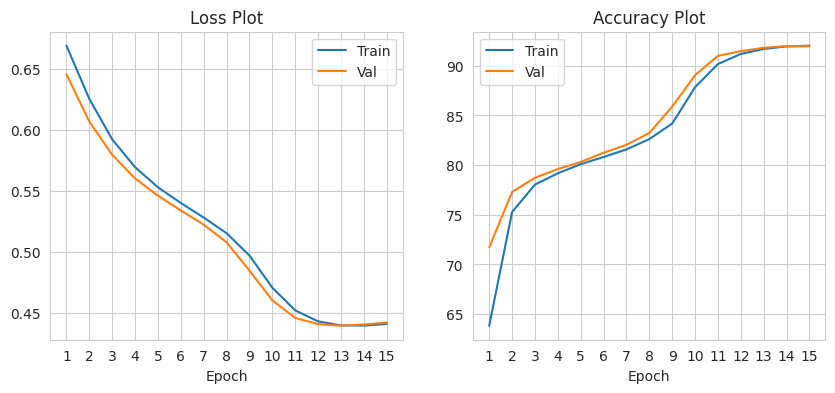

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(train_loss_list, label='Train')
ax[0].plot(val_loss_list, label='Val')
ax[0].set_title('Loss Plot')
ax[0].set_xlabel('Epoch')
ax[0].set_xticks(range(len(train_loss_list)),labels=range(1,len(train_loss_list)+1))
ax[0].legend()

ax[1].plot(train_acc_list, label='Train')
ax[1].plot(val_acc_list, label='Val')
ax[1].set_title('Accuracy Plot')
ax[1].set_xlabel('Epoch')
ax[1].set_xticks(range(len(train_loss_list)),labels=range(1,len(train_loss_list)+1))
ax[1].legend()

plt.show()

In [ ]:
inputs, labels = torch.from_numpy(np.array(X_test)).float().to(device), torch.from_numpy(np.array(y_test)).type(torch.LongTensor).to(device)
outputs = model(inputs)
predicted = torch.argmax(outputs, dim=1)

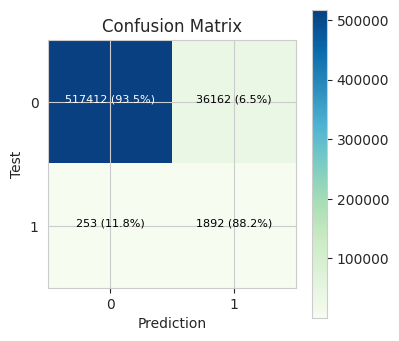

In [ ]:
plot_confusion_matrix(labels.cpu(), predicted.cpu())

In [ ]:
df_model6 = df_model_evaluation(labels.cpu(), predicted.cpu(), "model6", "ANN")
df_model6

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model6,ANN,90.84,93.45,4.97,88.21,9.41


In [ ]:
frames = [models, df_model6]
models = pd.concat(frames)

## 5.3 Model Comparison & Conclusion

In [ ]:
models

,model_id,method,roc_auc,accuracy,precision,recall,f1_score
0,model1,Logistic Regression,76.30,80.49,1.41,72.07,2.77
0,model2,SVM,77.83,83.54,1.67,72.07,3.27
0,model3,Desicion Tree,87.76,99.72,61.63,75.71,67.95
0,model4,Random Forest,85.25,99.86,90.65,70.54,79.34
0,model5,XGBoost,95.59,99.22,32.20,91.93,47.70
0,model6,ANN,90.84,93.45,4.97,88.21,9.41


We compared the models based on various metrics that were relevant for our predictions: 

1. The Logistic Regression model shows a high recall rate but a low precision rate, meaning that it will catch most potential fraudulent transactions but also affect many normal transactions. 

2. The SVM model has a similar effect to Logistic Regression, with the same recall rate, but other evaluation indices in SVM are better than those in Logistic Regression. Although SVM is better than Logistic Regression, it still did not perform well. 

3. Then, we tried tree-based models, which showed good effects, especially for Random Forest and XGBoost. Random Forest has excellent performance in precision rate and good performance in recall rate, while XGBoost has normal performance in precision rate and extraordinary performance in recall rate. Since the sample size is large, we also considered neural network models and tried the ANN model, which had good effect except for a low precision rate. 

To summarize, we chose the Random Forest model and XGBoost model for different scenarios. If we want to improve the overall customer experience, we could choose the Random Forest model. If we pay more attention to the safety of customer's property, we could choose the XGBoost model.

# 6 Discussion

## 6.1 Highlights

1. Before carrying out the project, we did investigations into the metrics and models used in the industry. Mainly there are six types of features that should be included in the machine learning model: There are several features that can be used for training a machine learning model for card fraud detection: Demographic information, Spending patterns, Time and location data, Device information, Transaction history and Velocities. Our feature engineering is based on this idea.
2. We have done a lot of cleaning and processing in the preparation phrase. Basically we did the following steps: \\
a) Data cleaning(checked null and duplicates, converted data type) \\
b) Exploratory data analysis \\
c) Preprocessing(extracted new features, outliers, encoding, scaling, balance)
3. Six models were built and compared. We defined functions to beautifully and concisely show and visualize the performance using confusion matrix, selected not only accuracy but recall, precision, f1 score as well to comprehensively evaluate the model.

## 6.2 Insights & Future work

1. Grid Search: We could do hyperparameter tuning using grid search. Our time and resources were limited this time so we only manually tried a few sets and picked the best set of parameters. One possible solution is to randomly select a subset to accelerate the searching process. 
2. Ensemble Method: We could try a few more tree based models such as CatBoost ensemble the models use bagging to find the best performance.
3. Deep Learning: For artificial neural network, the result shows that it may be overfitted on training set. We can modify the structure, use another loss function, apply dynamic learning rate or use pretrained model.
4. Suitable for tabular data: The final results show that tree based model maybe more suited for this type of tabular data while deep learning may perform better on images and text. 
5. Feature Engineering: In reality, doing data science project is more about feature engineering. Adding more features doesn't always lead to better result. For example at the beginning we added fraud transaction count in training set as a feature, which turned out causing our model extremely biased. The past fraud transaction history is important but we need to prevent model from predicting every credit card that has fraud before as fraud transaction.
6. Imbalanced dataset: Making the dataset balanced is very important to prevent overfitting on the majority data. And make sure we choose the right index to evaluate the model.